
## Optimizing Random Forest Classifier Model

Since we have identified that the best model for this dataset is a random forest model, I will be exploring what would be the best way to deploy this predictive machine as an interactive map for the end users. I have added the column "Station ID" in order to include location as one of the predictors, as I have discoved that keeping "Latitude" and "Longitude" causes too much multicollinearity and prevents accurate predictions. I have yet to figure out how to by pass that issue in the random forest model, so I came up with the idea of assigning each station name with an unique numeric ID, which later on could be mapped back to the latitude and longitudes in a separate chart for graphing purposes.





In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
#Only run this when using google.colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:


file_path = '/content/drive/MyDrive/Colab Notebooks/PCB_df_v3.csv' #use this command if using Google Colab
PCB_df = pd.read_csv(file_path, low_memory=False, index_col=0)


In [8]:


# PCB_df = pd.read_csv('PCB_df_v3.csv', low_memory=False, index_col=0) #use this command if running in Jupyter Notebook



In [9]:
PCB_df.drop_duplicates(inplace=True) #Dropping the duplicates since models does not do well with these

In [10]:
PCB_df.head()

OrganismID_Number   Latitude   Longitude  WeightAvg(g)  TLMax(mm)  \
0                  0  33.771563 -118.133022        29.692       10.6   
2                  0  33.771563 -118.133022        29.692       10.6   
4                  0  33.771563 -118.133022        29.692       10.6   
6                  0  33.771563 -118.133022        29.692       10.6   
8                  0  33.771563 -118.133022        29.692       10.6   

   TLAvgLength(mm)  TotalLength(mm)  OrganismWeight(g)  TissueWeight(g)  \
0             10.6             1.06              -88.0            -88.0   
2             10.6             1.06              -88.0            -88.0   
4             10.6             1.06              -88.0            -88.0   
6             10.6             1.06              -88.0            -88.0   
8             10.6             1.06              -88.0            -88.0   

   CompositeWeight(g)  ...  CommonName_Largemouth Bass  \
0               -88.0  ...                           0   
2               -88.0  ...                           0   
4               -88.0  ...                           0   
6               -88.0  ...                           0   
8               -88.0  ...                           0   

   CommonName_Rainbow Trout  CommonName_Shiner Surfperch  \
0                         0                            0   
2                         0                            0   
4                         0                            0   
6                         0                            0   
8                         0                            0   

   CommonName_Spotted Sand Bass  CommonName_Striped Bass  \
0                             0                        0   
2                             0                        0   
4                             0                        0   
6                             0                        0   
8                             0                        0   

   CommonName_Striped Mullet  CommonName_Tilapia spp.  CommonName_Top Smelt  \
0                          0                        0                     1   
2                          0                        0                     1   
4                          0                        0                     1   
6                          0                        0                     1   
8                          0                        0                     1   

   CommonName_White Croaker  Station ID  
0                         0           1  
2                         0           1  
4                         0           1  
6                         0           1  
8                         0           1  

[5 rows x 40 columns]

In [11]:
PCB_df.shape

(40263, 40)

In [12]:
PCB_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40263 entries, 0 to 42121
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   OrganismID_Number                         40263 non-null  int64  
 1   Latitude                                  40263 non-null  float64
 2   Longitude                                 40263 non-null  float64
 3   WeightAvg(g)                              40263 non-null  float64
 4   TLMax(mm)                                 40263 non-null  float64
 5   TLAvgLength(mm)                           40263 non-null  float64
 6   TotalLength(mm)                           40263 non-null  float64
 7   OrganismWeight(g)                         40263 non-null  float64
 8   TissueWeight(g)                           40263 non-null  float64
 9   CompositeWeight(g)                        40263 non-null  float64
 10  TLMin(mm)                              




### Setting Target Variable



In [13]:
X = PCB_df.drop(['PCB_threshold'], axis=1)
y = PCB_df[['PCB_threshold']]


In [14]:
X.head()

OrganismID_Number   Latitude   Longitude  WeightAvg(g)  TLMax(mm)  \
0                  0  33.771563 -118.133022        29.692       10.6   
2                  0  33.771563 -118.133022        29.692       10.6   
4                  0  33.771563 -118.133022        29.692       10.6   
6                  0  33.771563 -118.133022        29.692       10.6   
8                  0  33.771563 -118.133022        29.692       10.6   

   TLAvgLength(mm)  TotalLength(mm)  OrganismWeight(g)  TissueWeight(g)  \
0             10.6             1.06              -88.0            -88.0   
2             10.6             1.06              -88.0            -88.0   
4             10.6             1.06              -88.0            -88.0   
6             10.6             1.06              -88.0            -88.0   
8             10.6             1.06              -88.0            -88.0   

   CompositeWeight(g)  ...  CommonName_Largemouth Bass  \
0               -88.0  ...                           0   
2               -88.0  ...                           0   
4               -88.0  ...                           0   
6               -88.0  ...                           0   
8               -88.0  ...                           0   

   CommonName_Rainbow Trout  CommonName_Shiner Surfperch  \
0                         0                            0   
2                         0                            0   
4                         0                            0   
6                         0                            0   
8                         0                            0   

   CommonName_Spotted Sand Bass  CommonName_Striped Bass  \
0                             0                        0   
2                             0                        0   
4                             0                        0   
6                             0                        0   
8                             0                        0   

   CommonName_Striped Mullet  CommonName_Tilapia spp.  CommonName_Top Smelt  \
0                          0                        0                     1   
2                          0                        0                     1   
4                          0                        0                     1   
6                          0                        0                     1   
8                          0                        0                     1   

   CommonName_White Croaker  Station ID  
0                         0           1  
2                         0           1  
4                         0           1  
6                         0           1  
8                         0           1  

[5 rows x 39 columns]

In [15]:
y.head()

PCB_threshold
0              0
2              0
4              0
6              0
8              0

### Detecting Collinearity & VIF Values



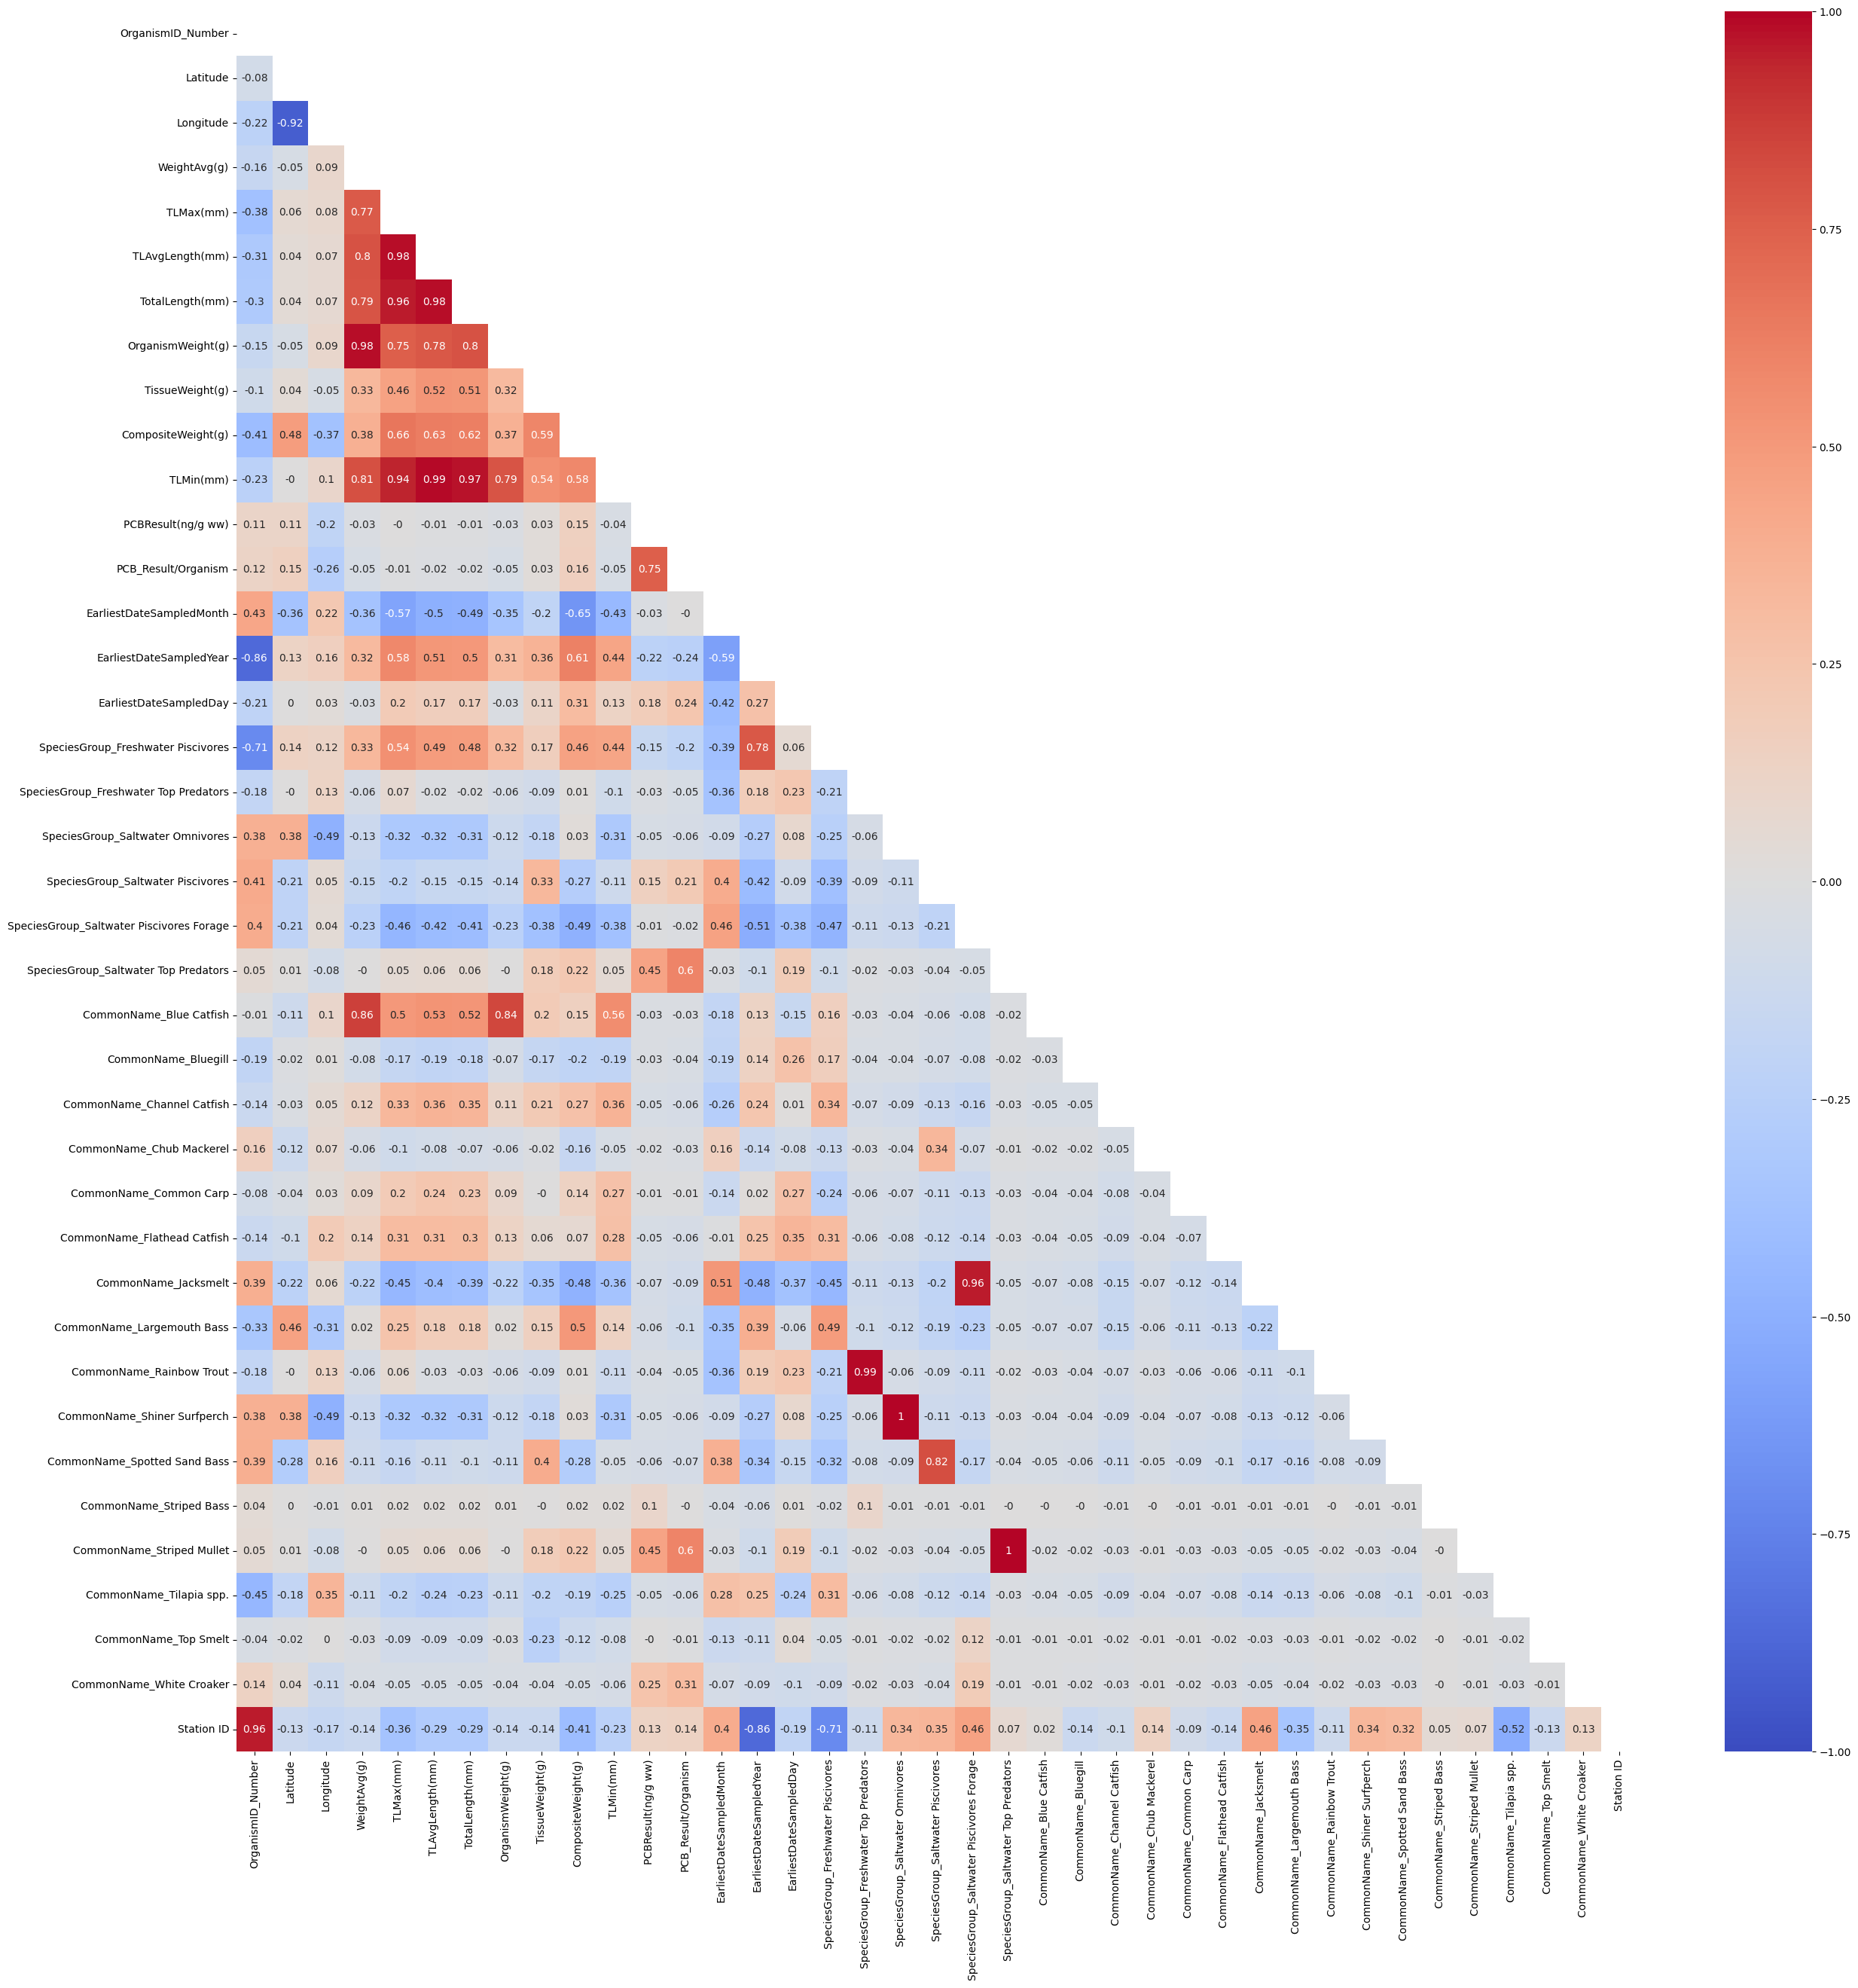

In [16]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper triangular
mask = np.triu(corr_df)

# Visualize
plt.figure(figsize=(30,30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

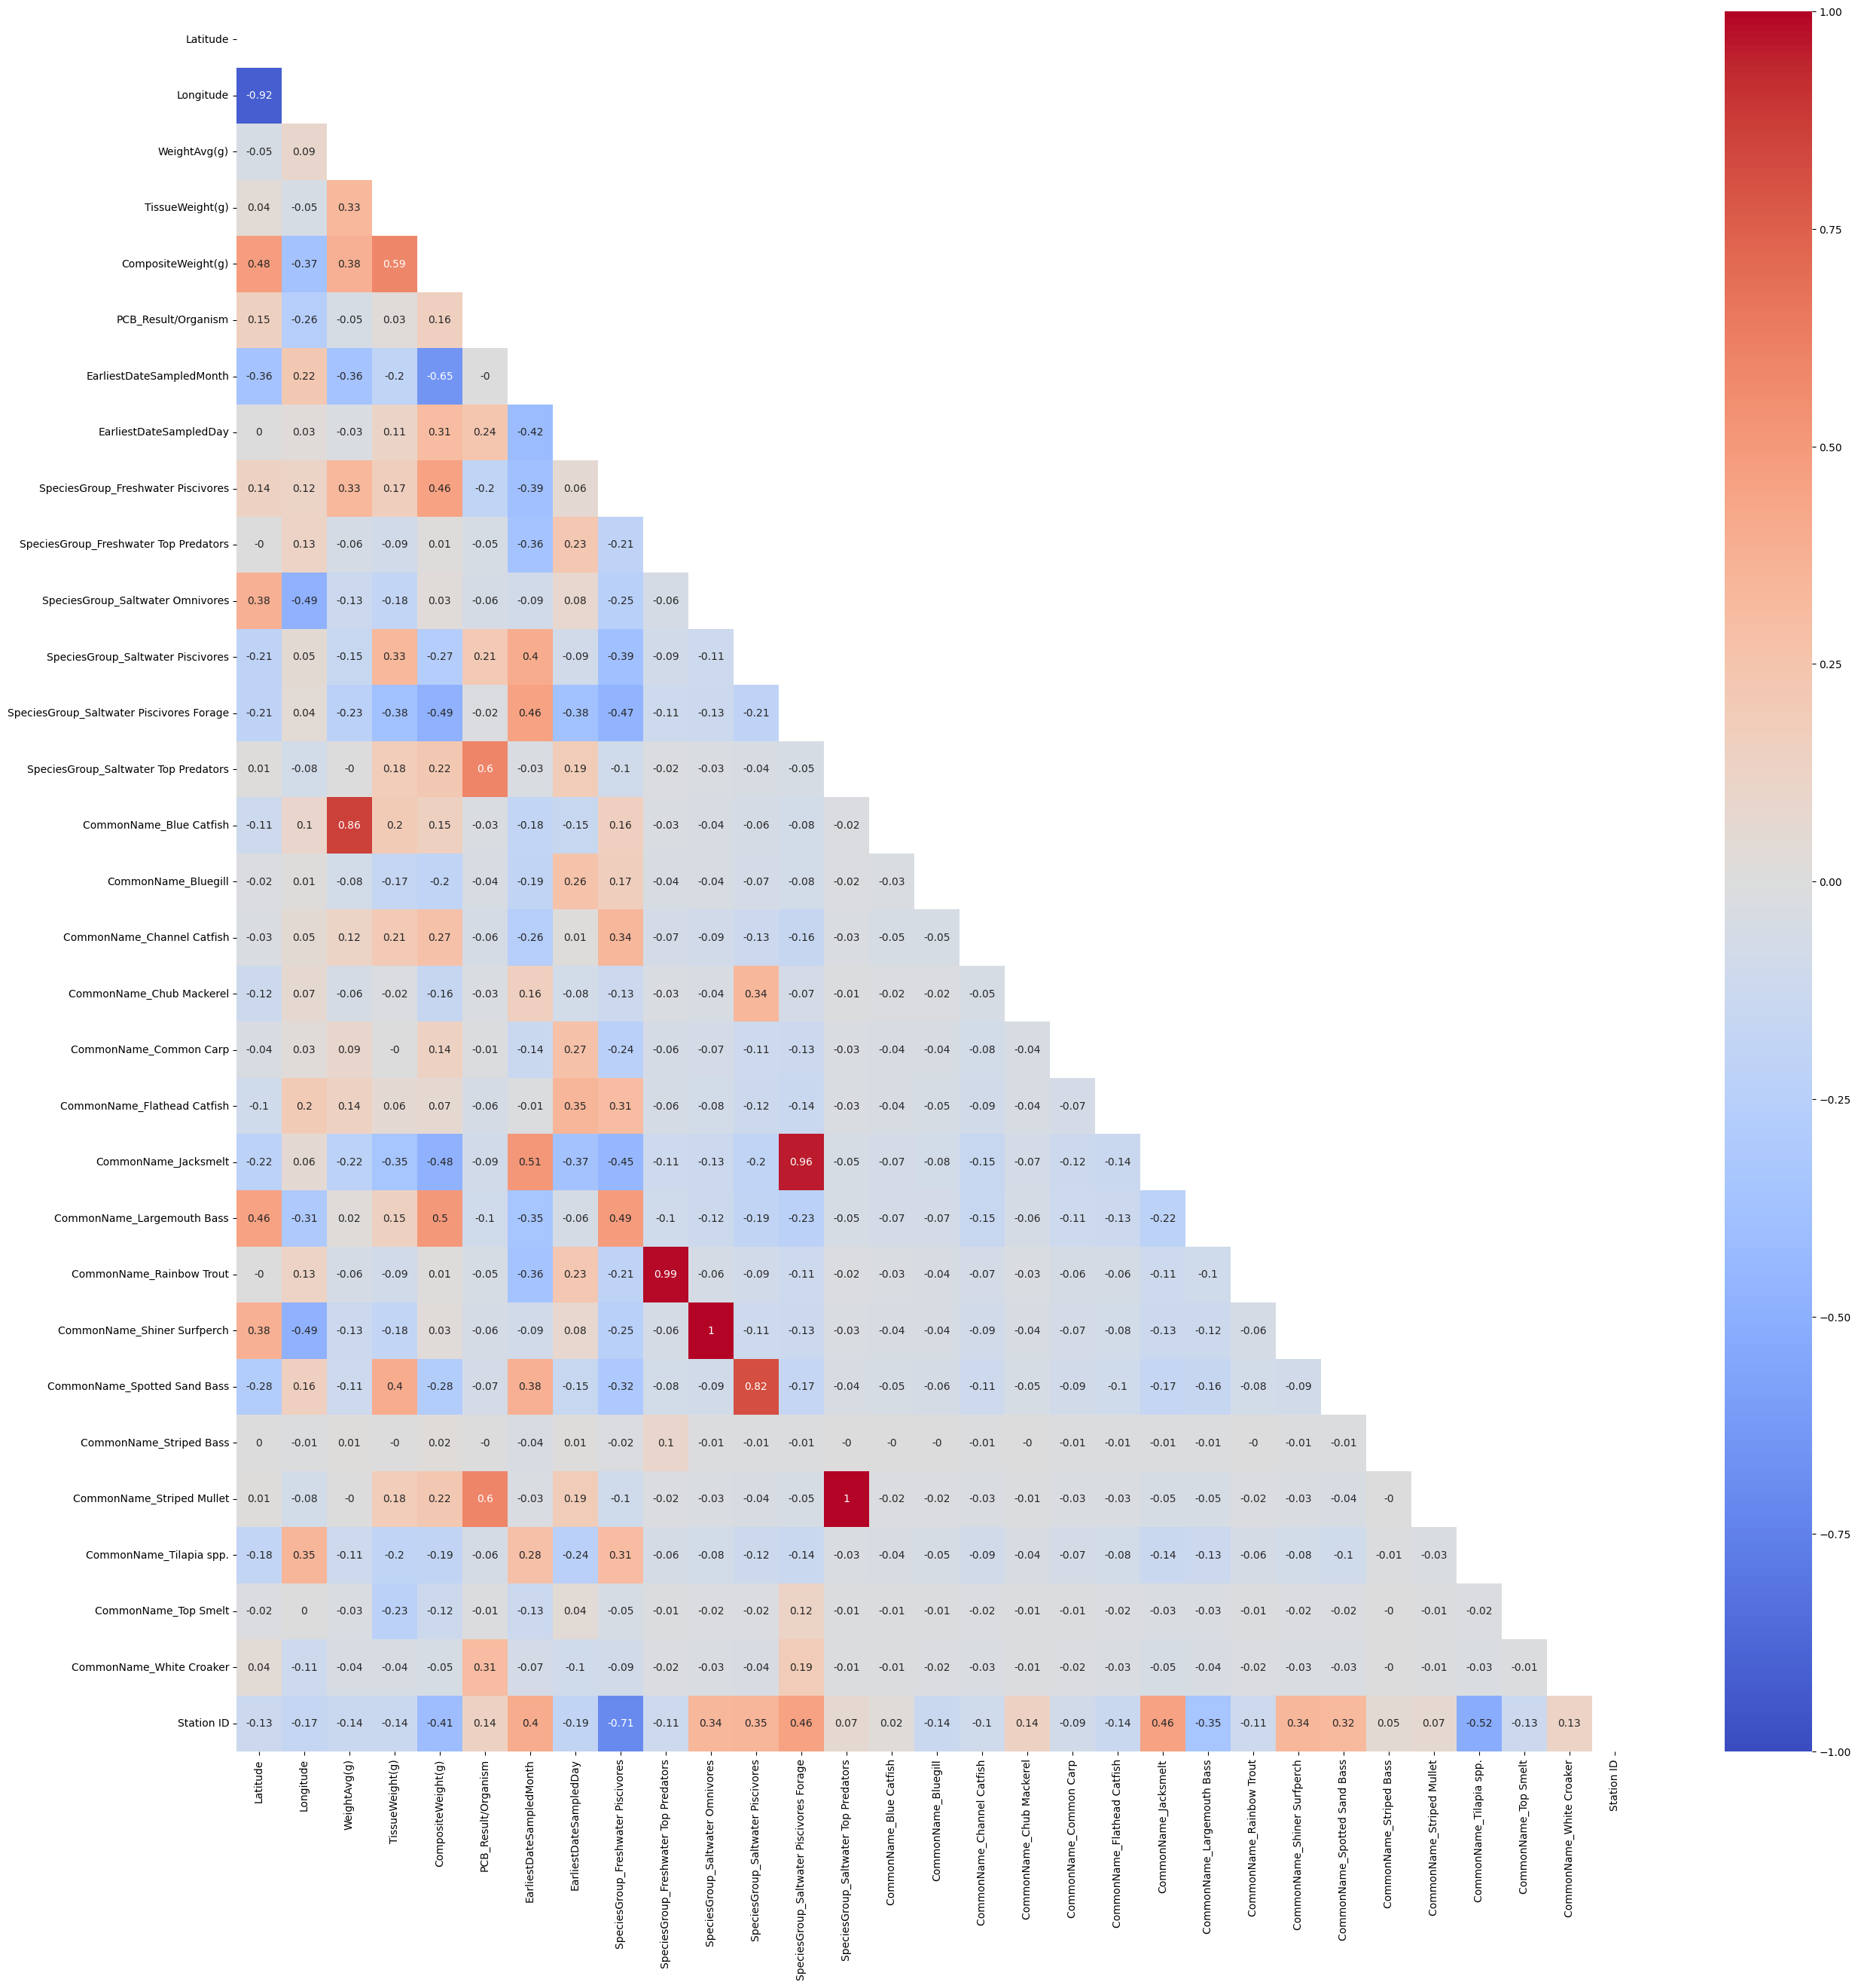

In [17]:
X_drop_col = ['TLMax(mm)', 'TLAvgLength(mm)','TotalLength(mm)','OrganismWeight(g)','TLMin(mm)', 'PCBResult(ng/g ww)','OrganismID_Number', 'EarliestDateSampledYear']


X.drop(columns=X_drop_col, inplace=True)

corr_df = X.corr()

# Mask for upper triangular
mask = np.triu(corr_df)

# Visualize
plt.figure(figsize=(30,30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

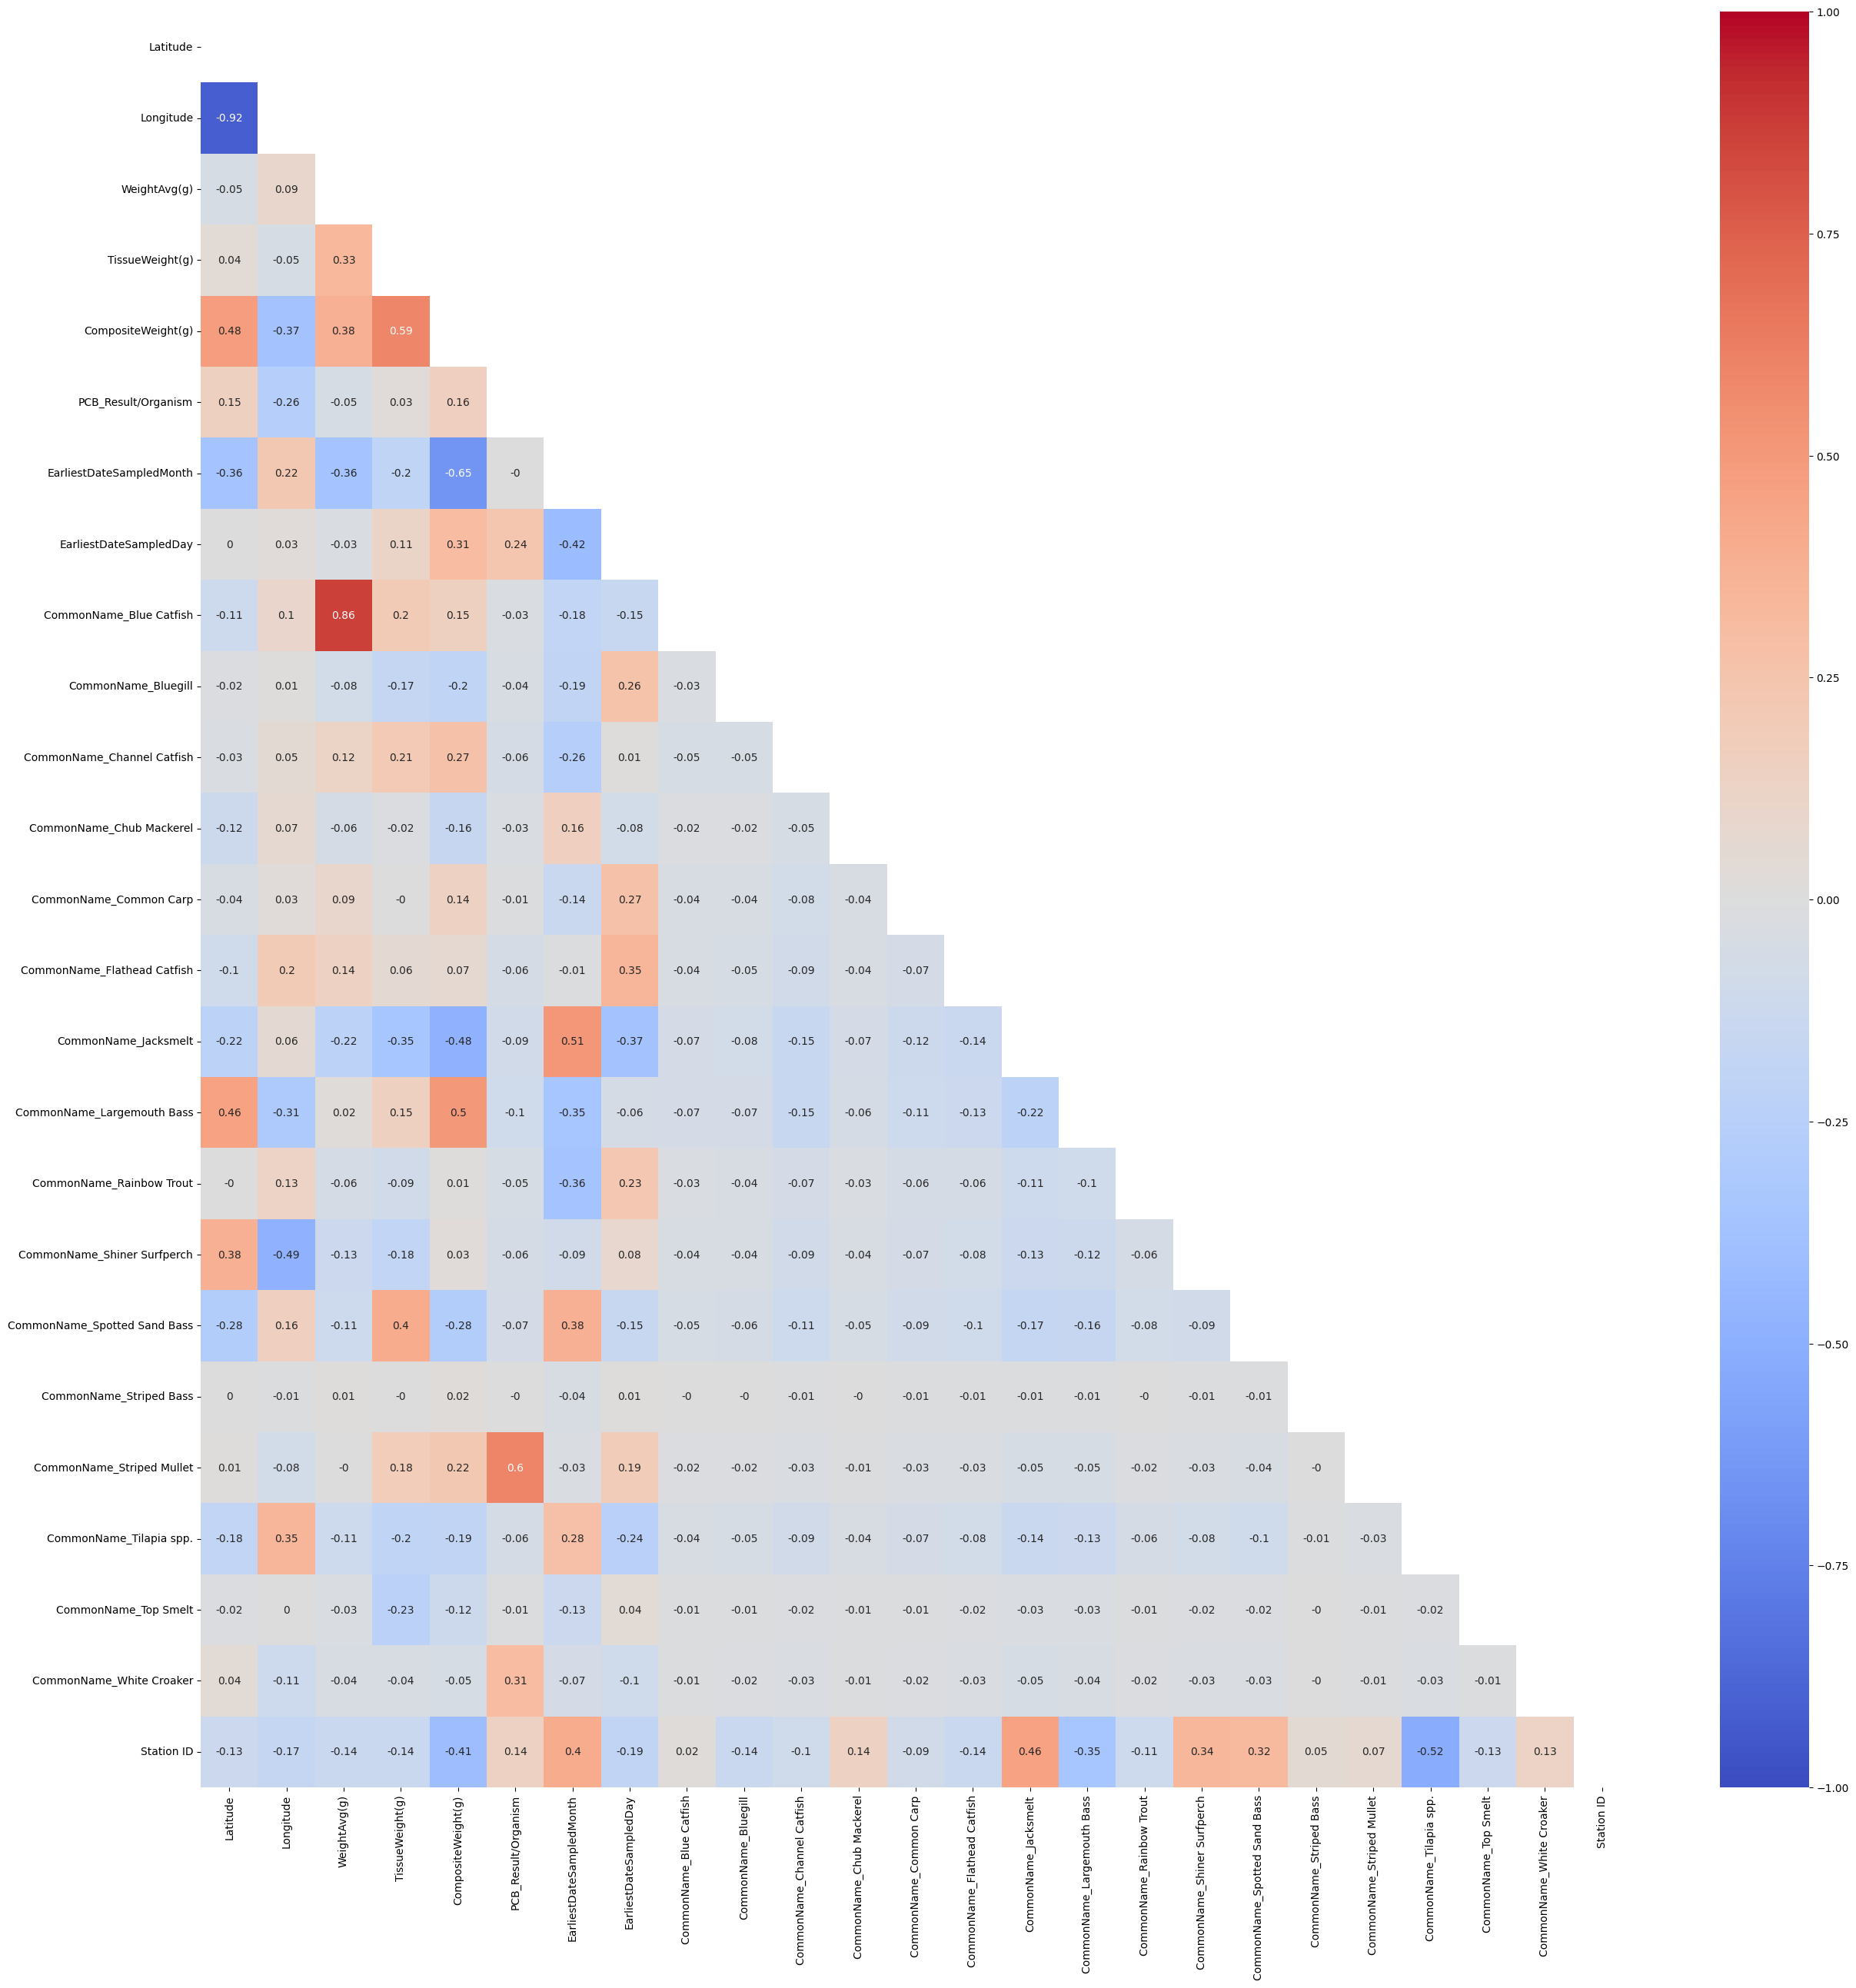

In [18]:

columns_with_speciesgroup = [col for col in X.columns if 'SpeciesGroup' in col]


X.drop(columns=columns_with_speciesgroup, inplace=True)

# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper triangular
mask = np.triu(corr_df)

# Visualize
plt.figure(figsize=(30,30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [19]:
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        27.344611
Longitude                       32.576560
WeightAvg(g)                     8.493512
TissueWeight(g)                  8.013047
CompositeWeight(g)              12.204363
PCB_Result/Organism             11.568951
EarliestDateSampledMonth         8.433162
EarliestDateSampledDay           3.601970
CommonName_Blue Catfish         13.286030
CommonName_Bluegill              9.251140
CommonName_Channel Catfish      22.415435
CommonName_Chub Mackerel         6.596804
CommonName_Common Carp          15.171464
CommonName_Flathead Catfish     22.148949
CommonName_Jacksmelt            41.980090
CommonName_Largemouth Bass      39.255156
CommonName_Rainbow Trout        15.271058
CommonName_Shiner Surfperch     17.627187
CommonName_Spotted Sand Bass    31.002297
CommonName_Striped Bass          1.152419
CommonName_Striped Mullet        2.181380
CommonName_Tilapia spp.         26.521863
CommonName_Top Smelt             2.803909
CommonName_White Croaker         1.764966
Station ID                      10.923212
dtype: float64

In [20]:
X.drop(columns=['WeightAvg(g)'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        27.223542
Longitude                       32.471631
TissueWeight(g)                  8.010582
CompositeWeight(g)              12.109404
PCB_Result/Organism             11.446247
EarliestDateSampledMonth         7.952221
EarliestDateSampledDay           3.441687
CommonName_Blue Catfish          6.646381
CommonName_Bluegill              9.228686
CommonName_Channel Catfish      21.886434
CommonName_Chub Mackerel         6.535457
CommonName_Common Carp          14.627406
CommonName_Flathead Catfish     20.977682
CommonName_Jacksmelt            41.619987
CommonName_Largemouth Bass      38.919701
CommonName_Rainbow Trout        15.238046
CommonName_Shiner Surfperch     17.599502
CommonName_Spotted Sand Bass    30.578315
CommonName_Striped Bass          1.150636
CommonName_Striped Mullet        2.180947
CommonName_Tilapia spp.         26.330177
CommonName_Top Smelt             2.803708
CommonName_White Croaker         1.755003
Station ID                      10.916694
dtype: float64

In [21]:
X.drop(columns=['TissueWeight(g)'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        27.167535
Longitude                       32.402098
CompositeWeight(g)               6.727425
PCB_Result/Organism             11.239492
EarliestDateSampledMonth         7.590604
EarliestDateSampledDay           3.360491
CommonName_Blue Catfish          6.624607
CommonName_Bluegill              9.090156
CommonName_Channel Catfish      21.805765
CommonName_Chub Mackerel         6.199344
CommonName_Common Carp          14.304303
CommonName_Flathead Catfish     20.921345
CommonName_Jacksmelt            40.864683
CommonName_Largemouth Bass      37.619041
CommonName_Rainbow Trout        14.825136
CommonName_Shiner Surfperch     17.535910
CommonName_Spotted Sand Bass    25.797430
CommonName_Striped Bass          1.150202
CommonName_Striped Mullet        2.107057
CommonName_Tilapia spp.         26.108103
CommonName_Top Smelt             2.423660
CommonName_White Croaker         1.673824
Station ID                       9.274066
dtype: float64

In [22]:
X.drop(columns=['CompositeWeight(g)'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        27.121036
Longitude                       31.641783
PCB_Result/Organism             11.000029
EarliestDateSampledMonth         6.706492
EarliestDateSampledDay           3.176390
CommonName_Blue Catfish          6.624603
CommonName_Bluegill              7.393024
CommonName_Channel Catfish      21.690903
CommonName_Chub Mackerel         6.032546
CommonName_Common Carp          14.049872
CommonName_Flathead Catfish     20.561529
CommonName_Jacksmelt            39.781425
CommonName_Largemouth Bass      37.337656
CommonName_Rainbow Trout        13.999030
CommonName_Shiner Surfperch     17.119784
CommonName_Spotted Sand Bass    25.368541
CommonName_Striped Bass          1.150099
CommonName_Striped Mullet        1.817078
CommonName_Tilapia spp.         25.125792
CommonName_Top Smelt             1.897390
CommonName_White Croaker         1.641911
Station ID                       8.267069
dtype: float64

In [23]:
X.drop(columns=['EarliestDateSampledDay'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        26.462844
Longitude                       31.625248
PCB_Result/Organism             10.171351
EarliestDateSampledMonth         6.706491
CommonName_Blue Catfish          6.597554
CommonName_Bluegill              7.143155
CommonName_Channel Catfish      21.642114
CommonName_Chub Mackerel         6.032526
CommonName_Common Carp          13.721754
CommonName_Flathead Catfish     20.071513
CommonName_Jacksmelt            39.780990
CommonName_Largemouth Bass      37.198068
CommonName_Rainbow Trout        13.700144
CommonName_Shiner Surfperch     16.407083
CommonName_Spotted Sand Bass    25.361739
CommonName_Striped Bass          1.144029
CommonName_Striped Mullet        1.810494
CommonName_Tilapia spp.         24.817432
CommonName_Top Smelt             1.896683
CommonName_White Croaker         1.568812
Station ID                       7.770197
dtype: float64

In [24]:
# I am dropping this even though the VIF is low since this is another target variable for the other model

X.drop(columns=['PCB_Result/Organism'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


Latitude                        26.290761
Longitude                       31.516742
EarliestDateSampledMonth         6.625718
CommonName_Blue Catfish          2.638877
CommonName_Bluegill              2.967658
CommonName_Channel Catfish       6.861965
CommonName_Chub Mackerel         2.145884
CommonName_Common Carp           4.612498
CommonName_Flathead Catfish      7.158726
CommonName_Jacksmelt             9.386113
CommonName_Largemouth Bass      12.019023
CommonName_Rainbow Trout         6.060461
CommonName_Shiner Surfperch      4.191743
CommonName_Spotted Sand Bass     6.572757
CommonName_Striped Bass          1.050693
CommonName_Striped Mullet        1.463206
CommonName_Tilapia spp.         12.491449
CommonName_Top Smelt             1.423627
CommonName_White Croaker         1.505651
Station ID                       7.590757
dtype: float64

In [25]:
# I am dropping this even though the VIF is low since this is another target variable for the other model

X.drop(columns=['Latitude', 'Longitude'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


EarliestDateSampledMonth        6.540684
CommonName_Blue Catfish         2.159266
CommonName_Bluegill             2.421660
CommonName_Channel Catfish      4.998081
CommonName_Chub Mackerel        1.922864
CommonName_Common Carp          3.523888
CommonName_Flathead Catfish     4.122974
CommonName_Jacksmelt            8.142351
CommonName_Largemouth Bass      8.220682
CommonName_Rainbow Trout        3.706694
CommonName_Shiner Surfperch     4.099797
CommonName_Spotted Sand Bass    5.458384
CommonName_Striped Bass         1.048436
CommonName_Striped Mullet       1.442201
CommonName_Tilapia spp.         6.568036
CommonName_Top Smelt            1.348640
CommonName_White Croaker        1.489166
Station ID                      6.932217
dtype: float64

Intitially, I had wanted to keep the EarliestDateSampledMonth column to see if seasonlity is one of the predictive features of toxic levels, however, after graphing it against the Station ID, I noticed that the data is extrememly unbalanced. even though month 9 shows the highest level of PCBs, it has a relatively low station counts. The graph below also shows how not every stations were tested monthly. Therefore, this column needs to be dropped as it is not a good predictive feature.

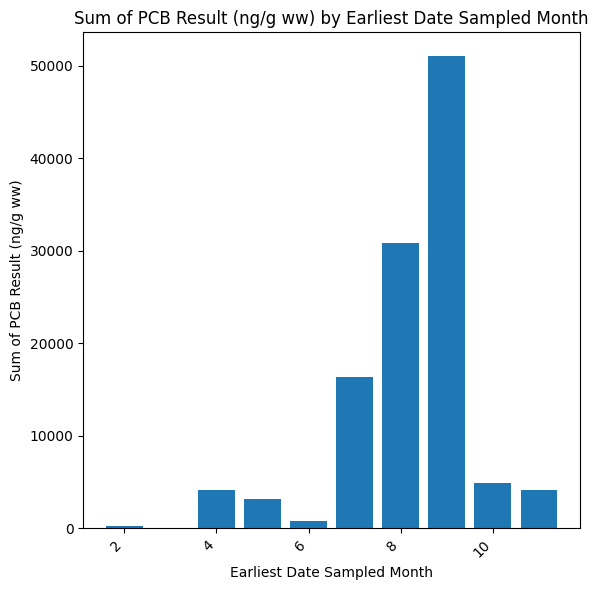

In [39]:
monthly_pcb_sum = PCB_df.groupby('EarliestDateSampledMonth')['PCBResult(ng/g ww)'].sum()

# Create the bar graph using matplotlib
plt.figure(figsize=(6, 6))
plt.bar(monthly_pcb_sum.index, monthly_pcb_sum.values)
plt.xlabel('Earliest Date Sampled Month')
plt.ylabel('Sum of PCB Result (ng/g ww)')
plt.title('Sum of PCB Result (ng/g ww) by Earliest Date Sampled Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [41]:
grouped_df = PCB_df.groupby(['EarliestDateSampledMonth', 'Station ID']).size().reset_index(name='Count')

fig = px.bar(grouped_df, x='EarliestDateSampledMonth', y='Count', color='Station ID',
             title='Count of Samples per Month and Station',
             labels={'EarliestDateSampledMonth': 'Month', 'Count': 'Number of Samples'})

# Customize the layout (optional)
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Samples', barmode='group')


fig.show()

In [42]:

X.drop(columns=['EarliestDateSampledMonth'], inplace=True)
X_withconstant = sm.add_constant(X)
variance_inflation_factor(X_withconstant, 1)
pd.Series([variance_inflation_factor(X_withconstant.values, i)
          for i in range(X_withconstant.shape[1])],
         index=X_withconstant.columns)[1:] # leaving out the constant


CommonName_Blue Catfish         1.915152
CommonName_Bluegill             2.236982
CommonName_Channel Catfish      4.605034
CommonName_Chub Mackerel        1.840325
CommonName_Common Carp          3.409444
CommonName_Flathead Catfish     4.122956
CommonName_Jacksmelt            7.581611
CommonName_Largemouth Bass      7.778676
CommonName_Rainbow Trout        2.965522
CommonName_Shiner Surfperch     3.891671
CommonName_Spotted Sand Bass    5.049847
CommonName_Striped Bass         1.032513
CommonName_Striped Mullet       1.424680
CommonName_Tilapia spp.         5.810142
CommonName_Top Smelt            1.272767
CommonName_White Croaker        1.419040
Station ID                      6.607574
dtype: float64

## Fitting The Model

In order to fine tune the hyperparameters, I used a grid search to optimize


In [43]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [45]:
#we give our estimators as a list of tuples: name:function.
estimators = [('normalise', RobustScaler()),
              ('model', RandomForestClassifier())]

pipe = Pipeline(estimators)

In [46]:
param_grid = [{
    'model': [RandomForestClassifier()],
    'normalise':[None, MinMaxScaler(), StandardScaler(), RobustScaler()],
    'model__n_estimators': [10, 20, 30, 40, 50],
    'model__max_depth': [None, 5, 10, 20]
}]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [47]:
fittedgrid = grid.fit(X_train, y_train)

In [48]:
print("Best parameters:", fittedgrid.best_params_)
print("Best score:", fittedgrid.best_score_)

Best parameters: {'model': RandomForestClassifier(), 'model__max_depth': None, 'model__n_estimators': 10, 'normalise': None}
Best score: 0.9723688295560384


The best performing model is one that has no limitation on max depth, with 10 trees within the ensemble, and no scaling to the data (as expected from previous rounds).

## Model Evaluation

### Confusion Matrix and Precision & Recall

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7362
           1       1.00      0.69      0.82       691

    accuracy                           0.97      8053
   macro avg       0.99      0.85      0.90      8053
weighted avg       0.97      0.97      0.97      8053



Predicted Non-Toxic  Predicted Toxic
True Non-Toxic                 7362                0
True Toxic                      214              477

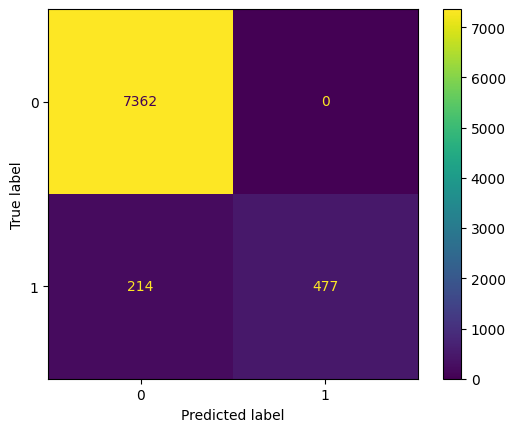

In [49]:

# Access the best estimator
best_rf_model = fittedgrid.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

# Print classification report for the best model
print(classification_report(y_test, y_pred))

#Confusion matrix for the best model
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Toxic", "Predicted Toxic"],
    index=["True Non-Toxic", "True Toxic"]
)

display(cf_df)
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)

The precision and recall scores are comparable to the previous models

### Cross Validation Score

In [58]:
scores = cross_val_score(fittedgrid.best_estimator_, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.99652303 0.93232336 0.914566   0.26502732 0.41306508]
Mean cross-validation score: 0.7043009584601864


May not be the best score since the last two tests seems to indicate leakage

### ROC - AUC Curve

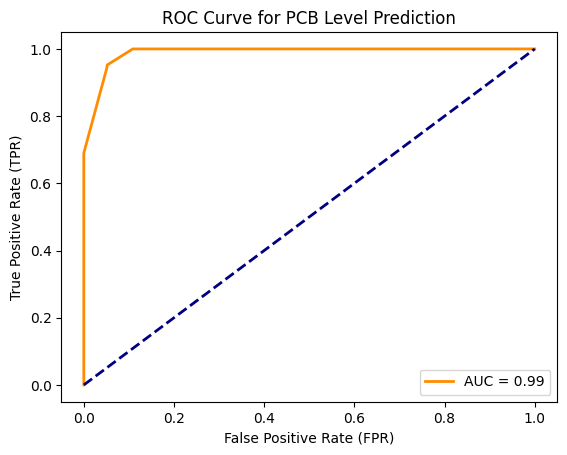

Area under curve (AUC):0.9892499560657044



In [59]:


y_proba = best_rf_model.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for PCB Level Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

A 98% score indicates that the model is a good fit.

## Glance at the Tree

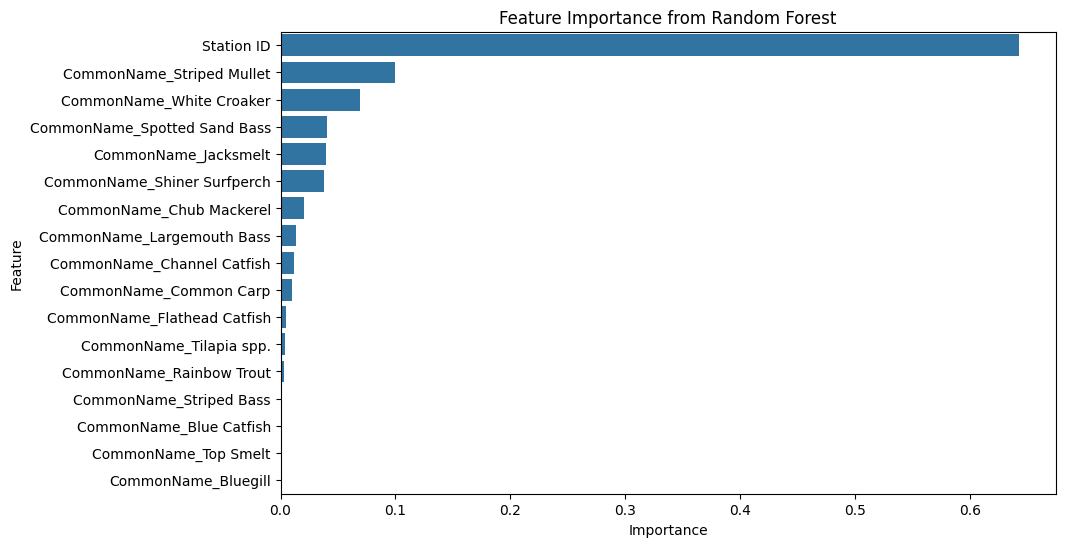

In [51]:

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.named_steps['model'].feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

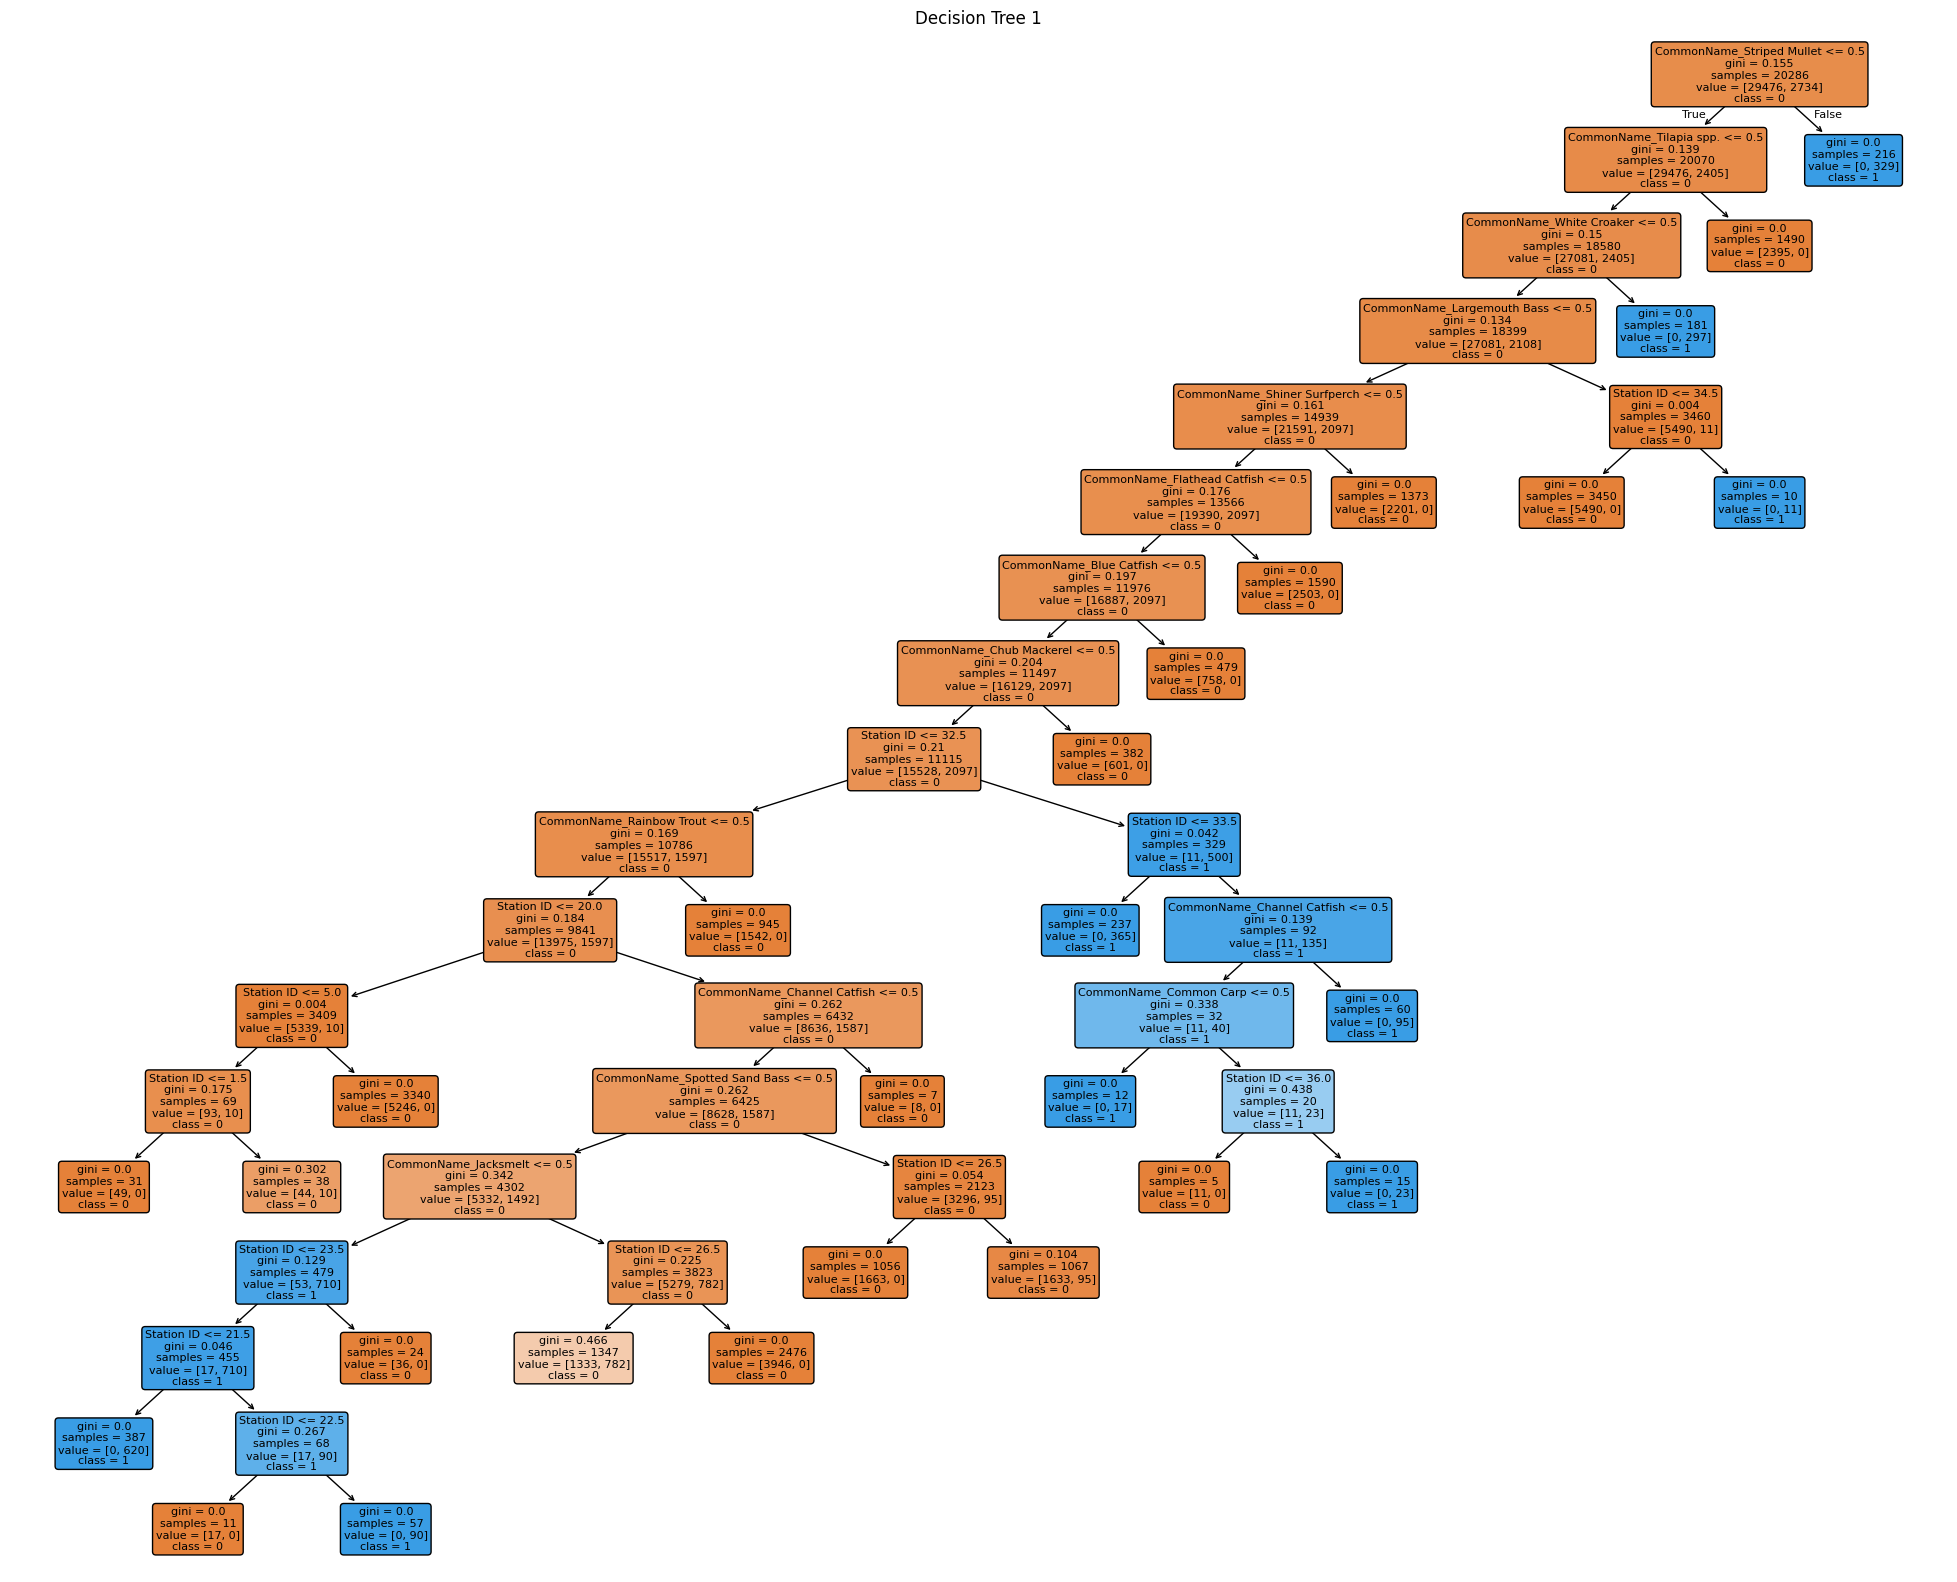

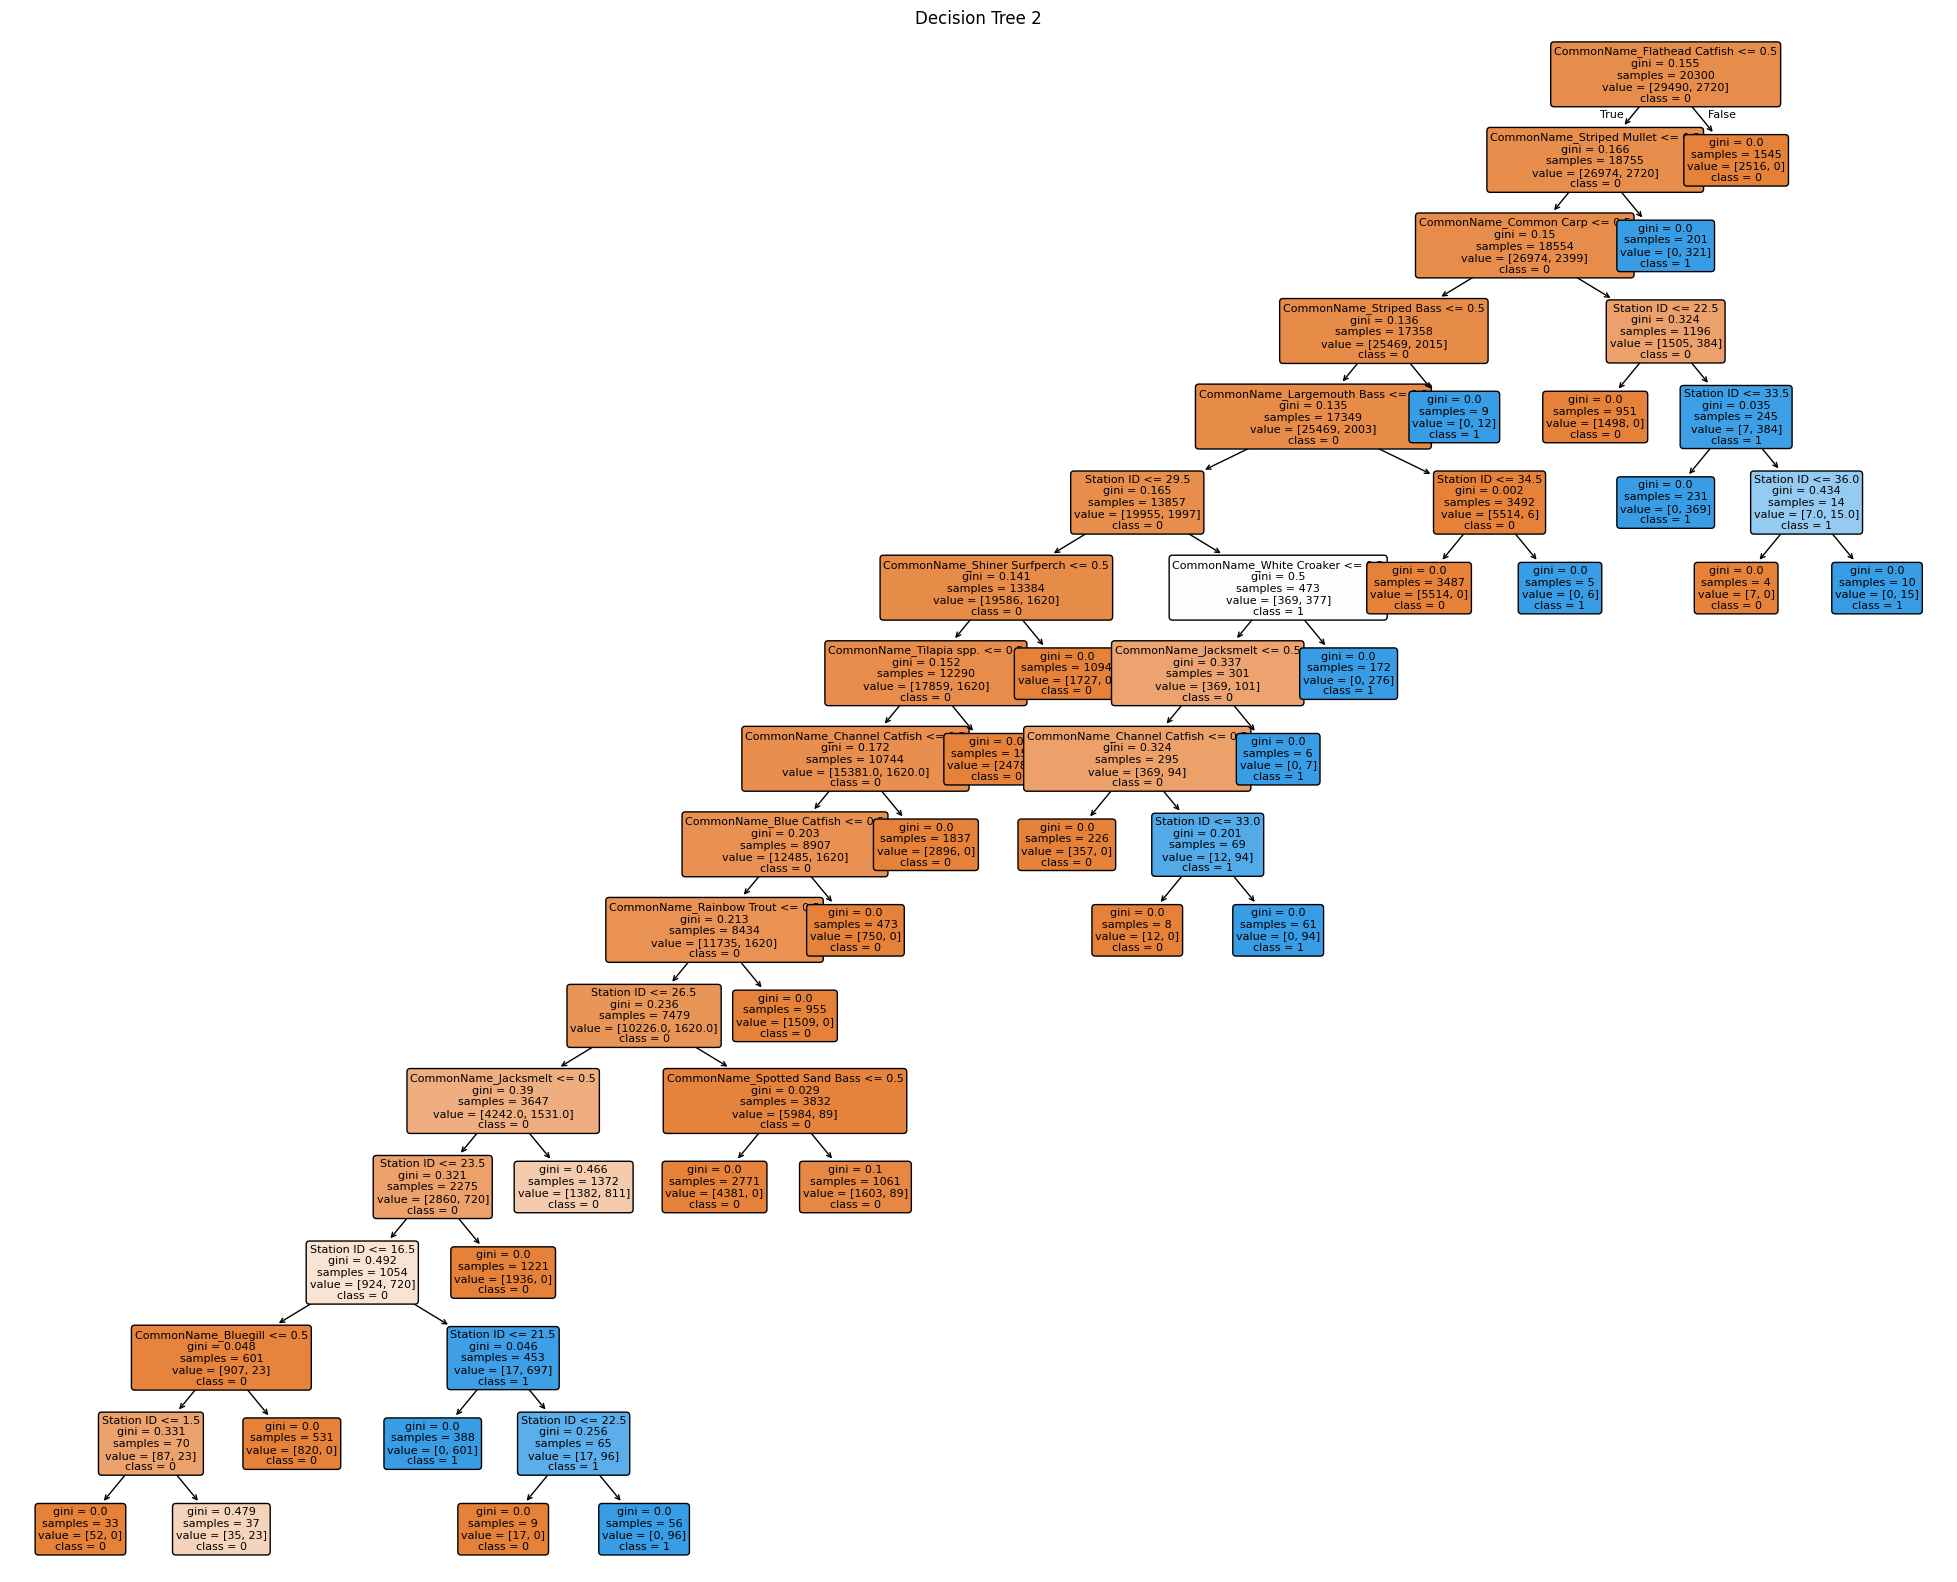

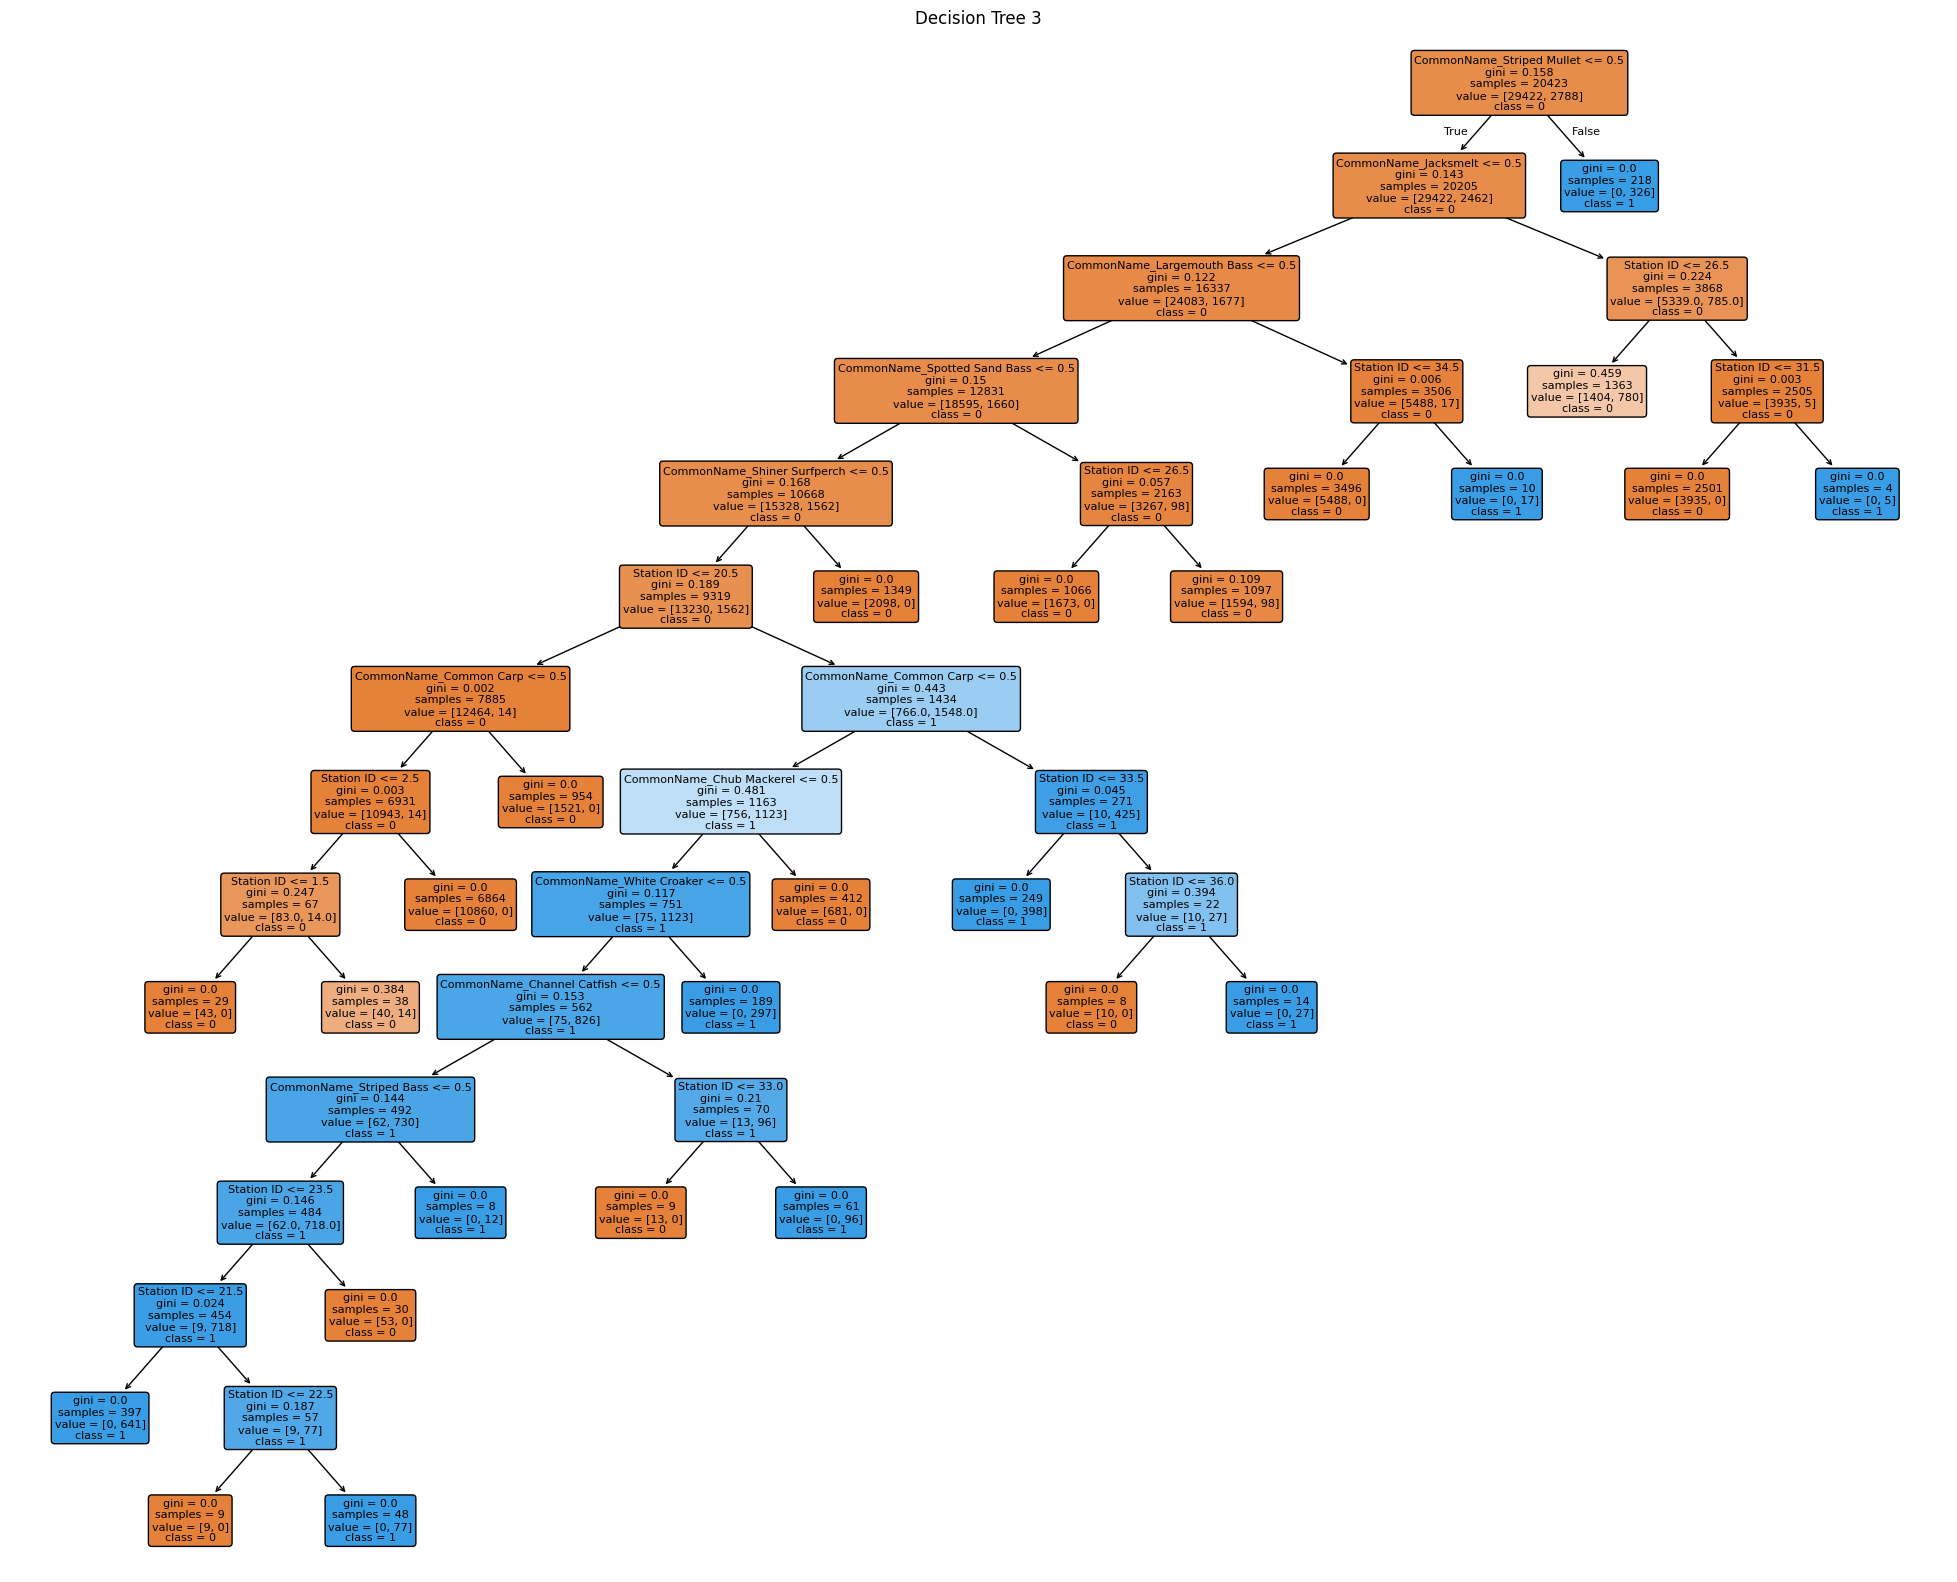

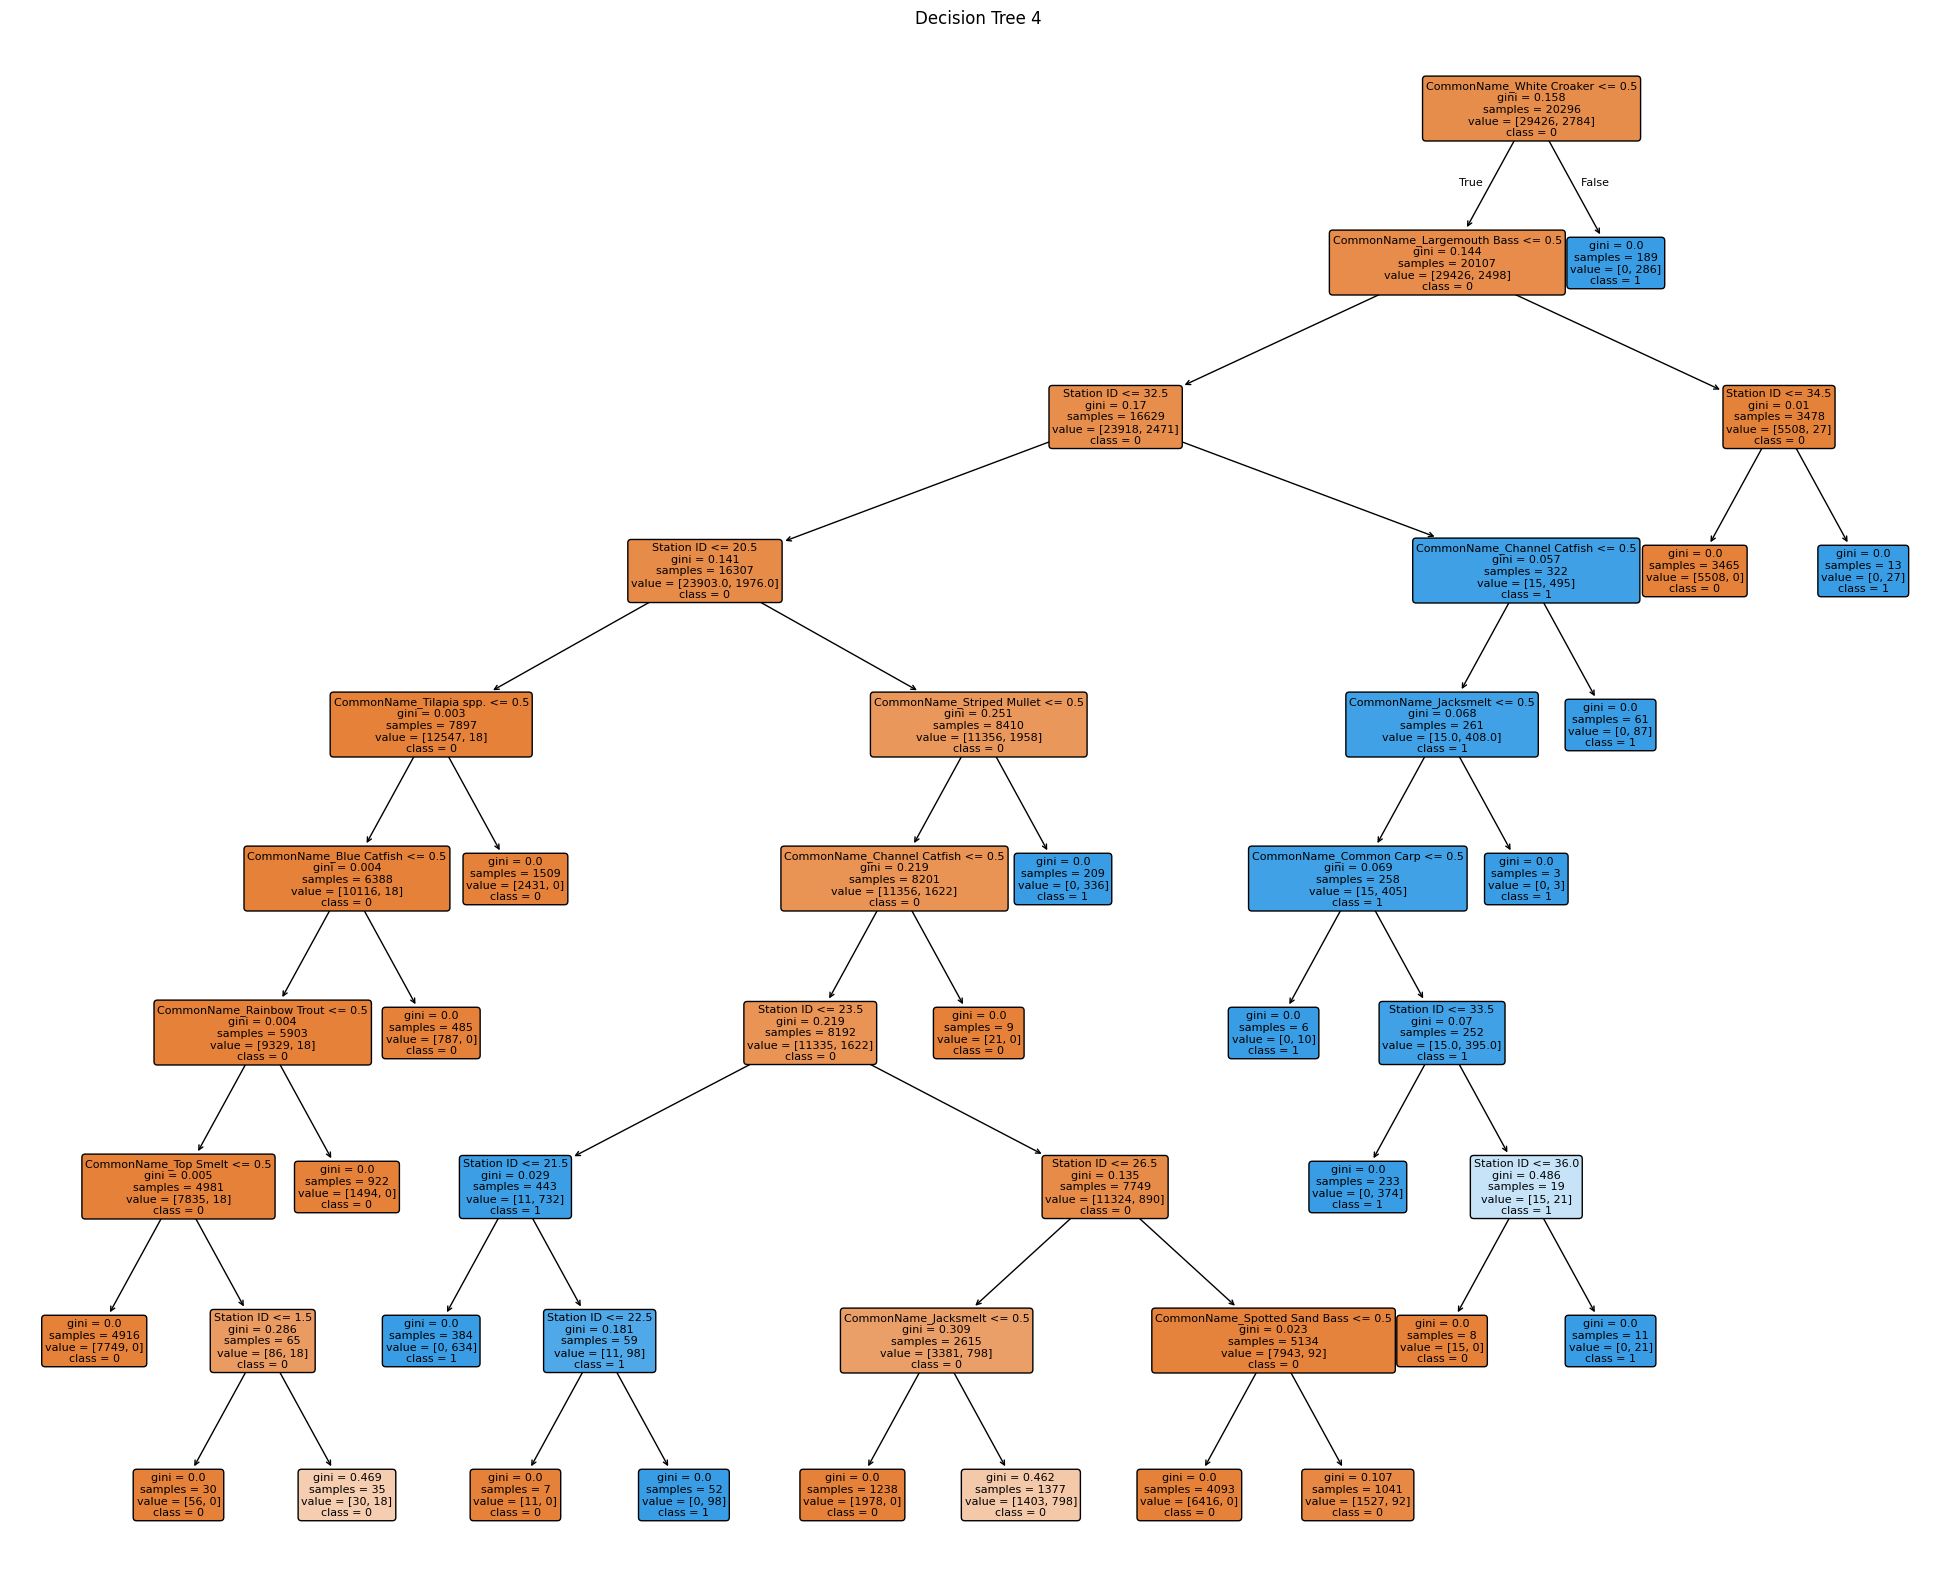

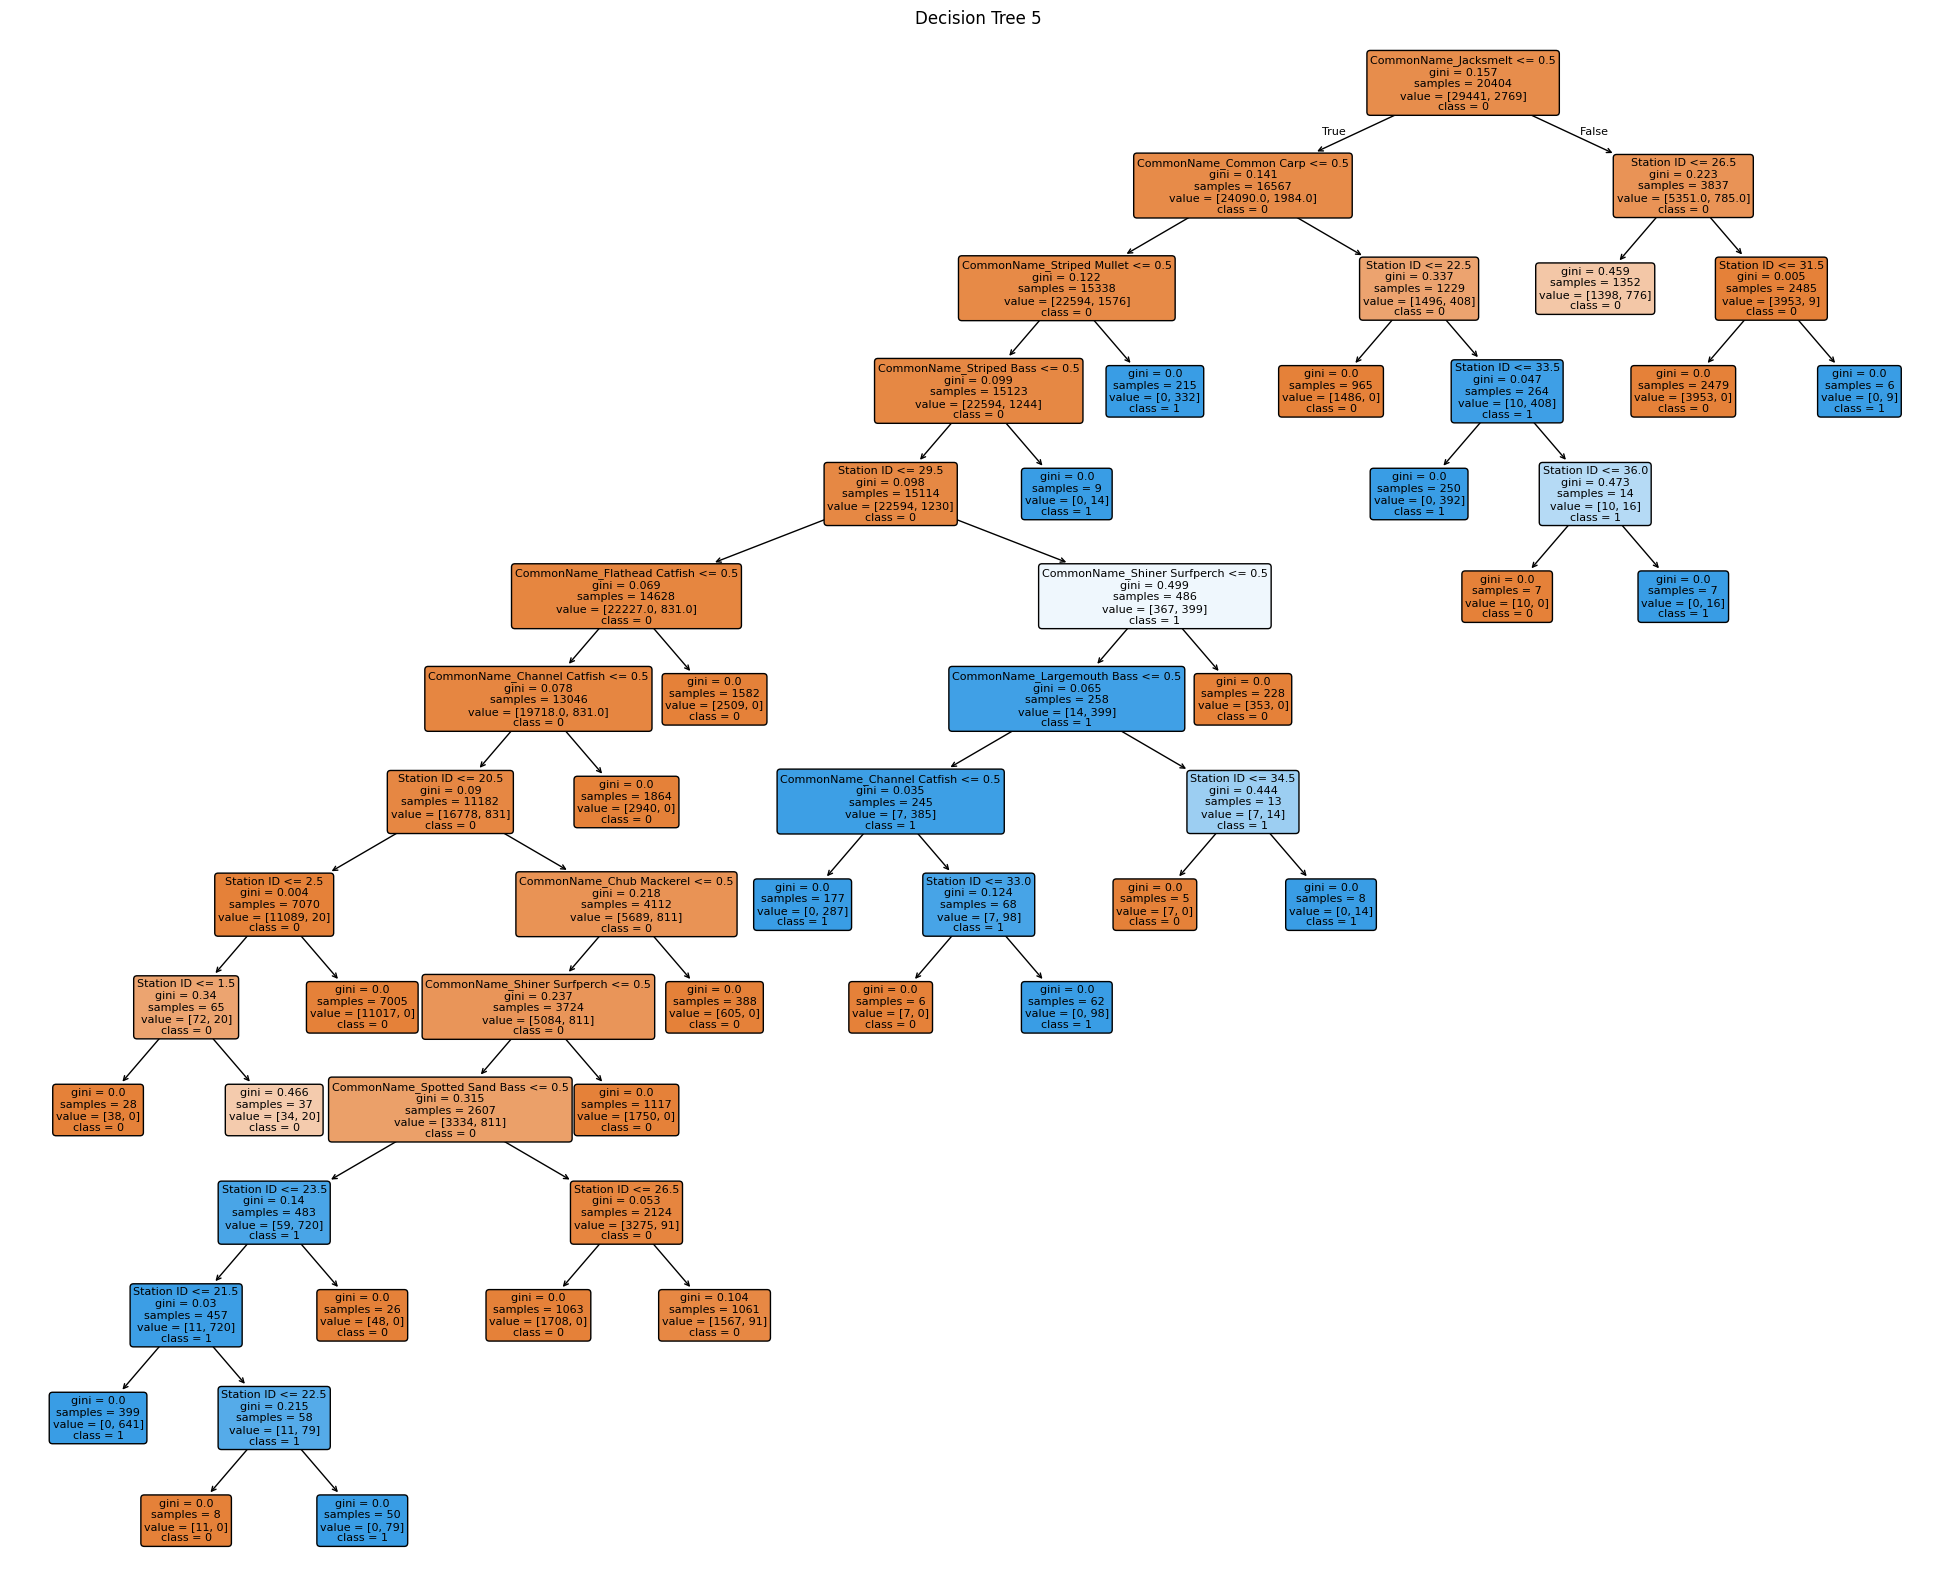

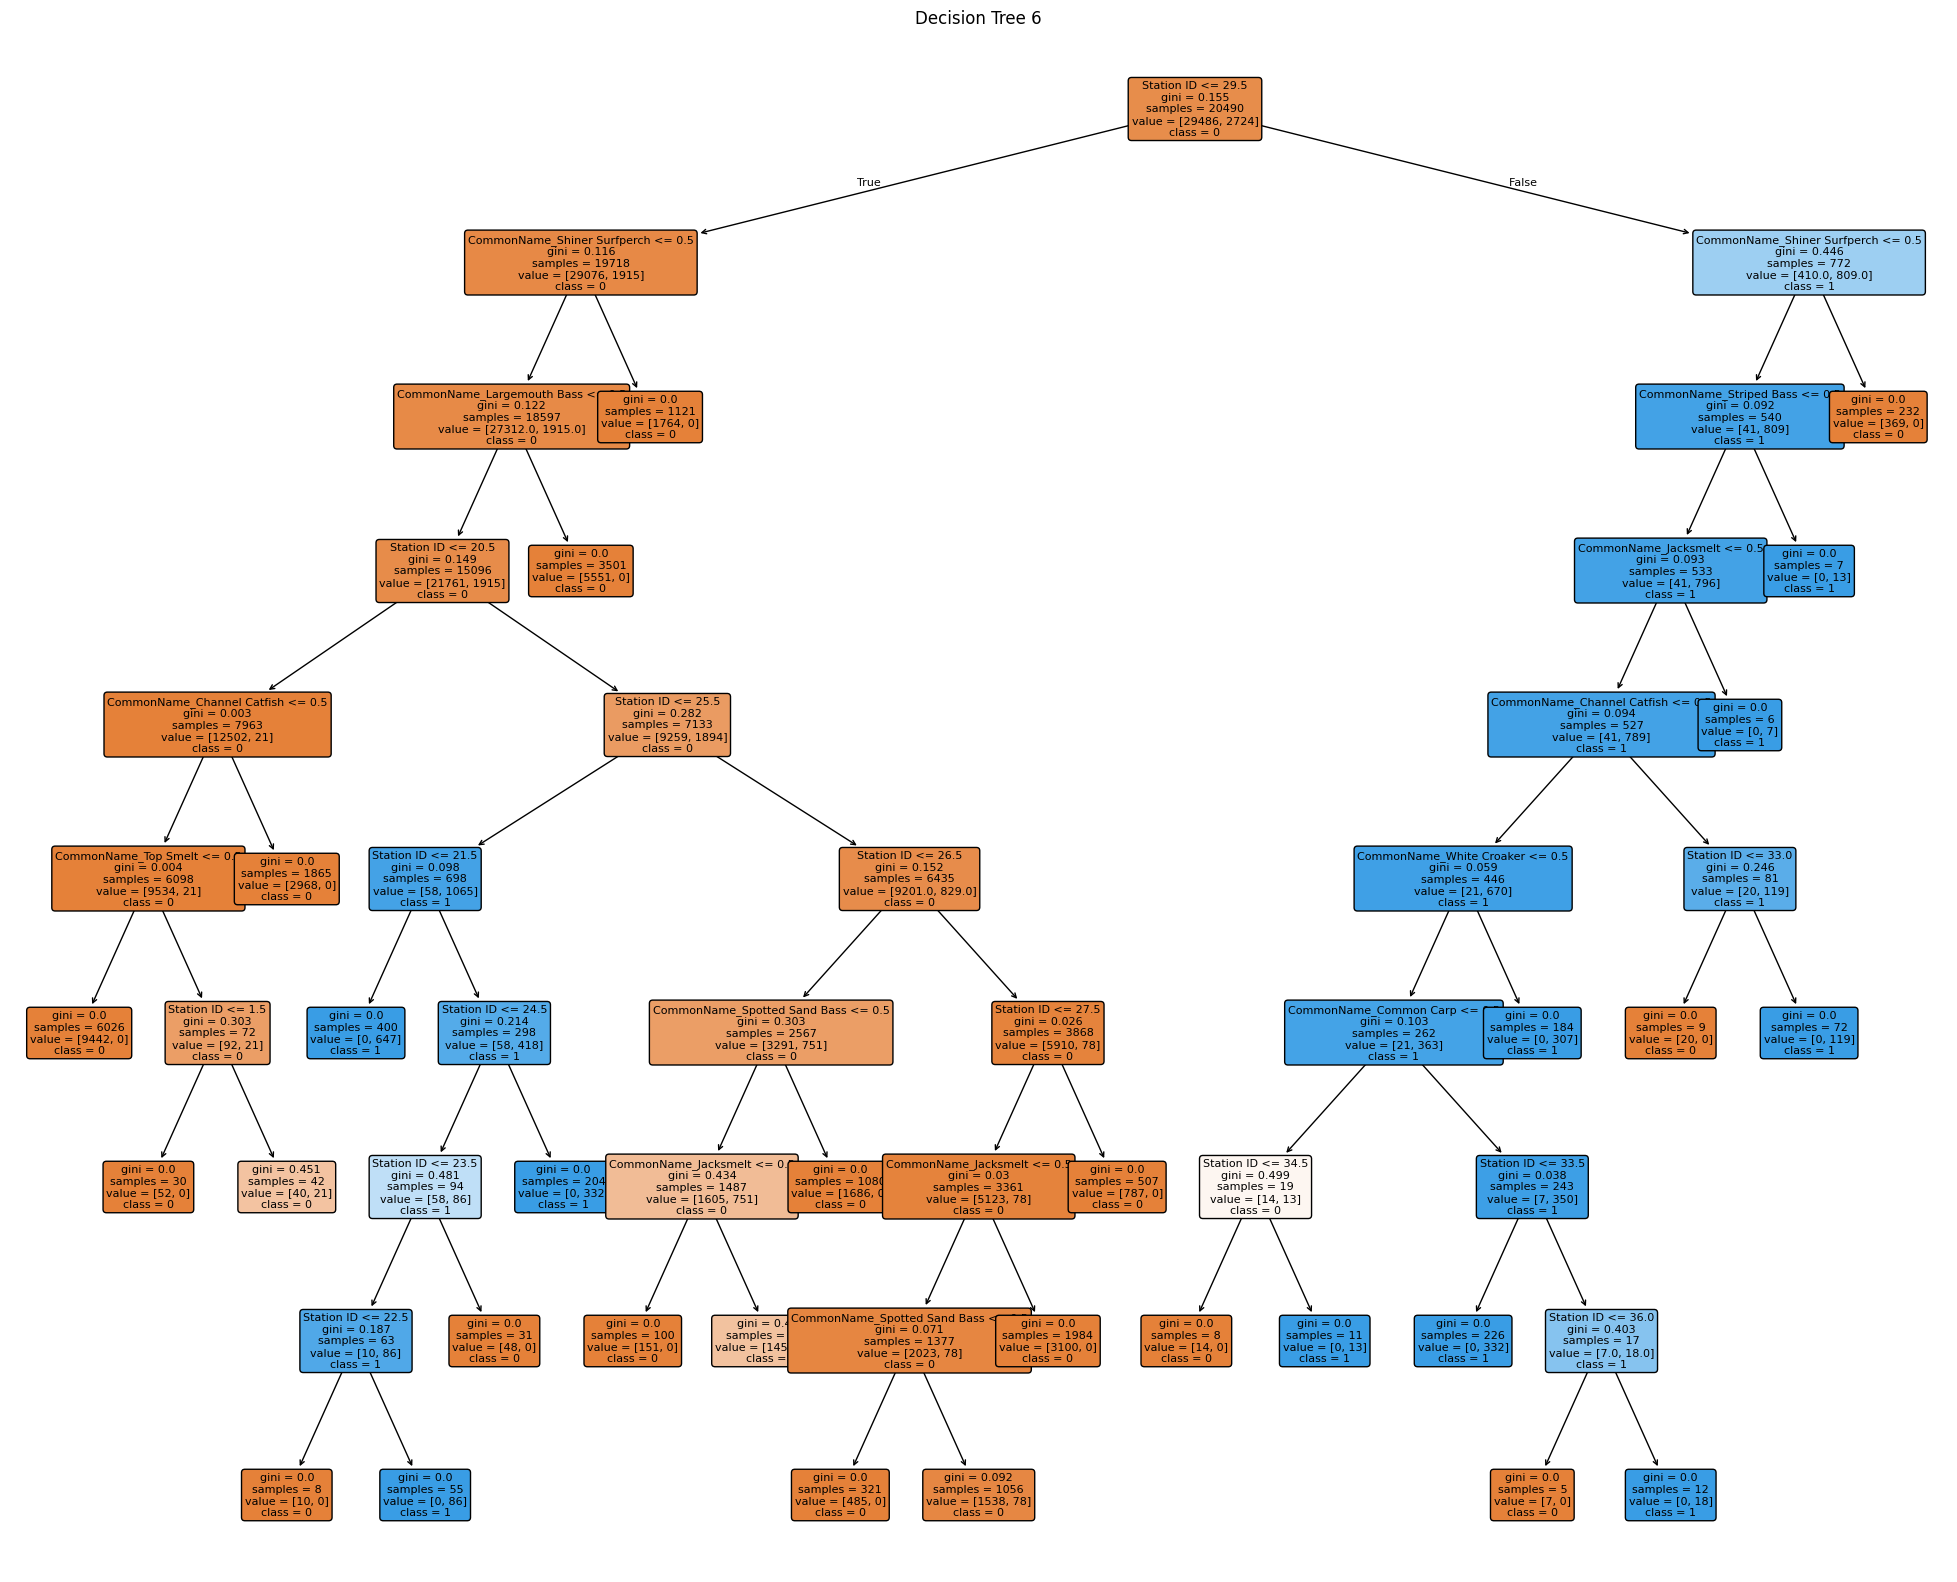

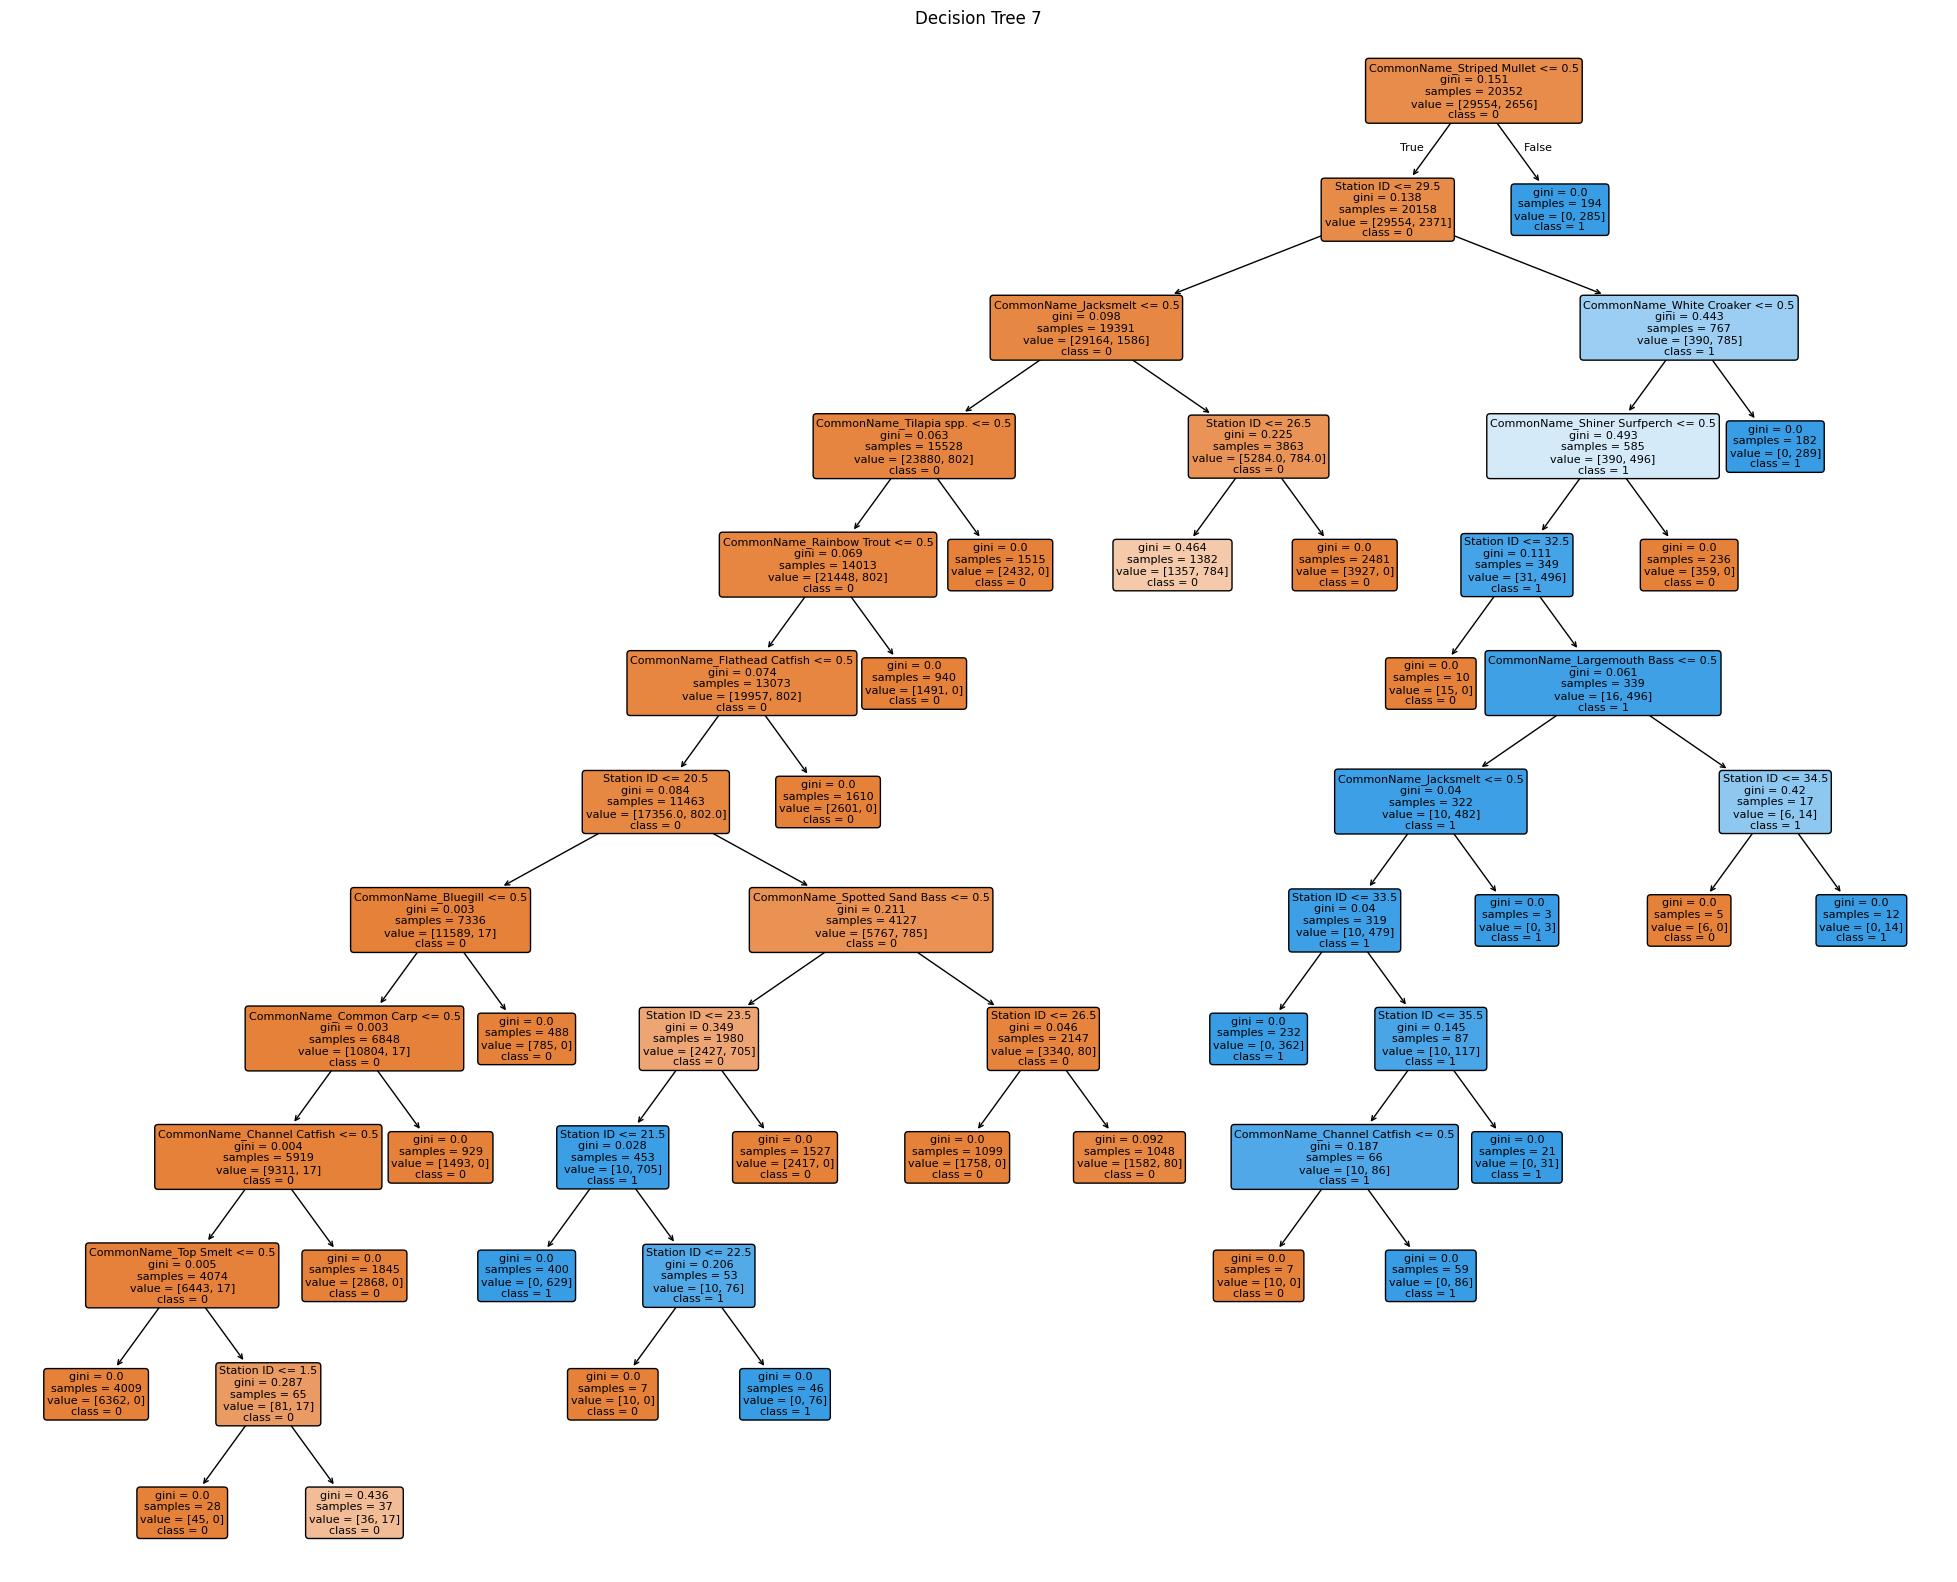

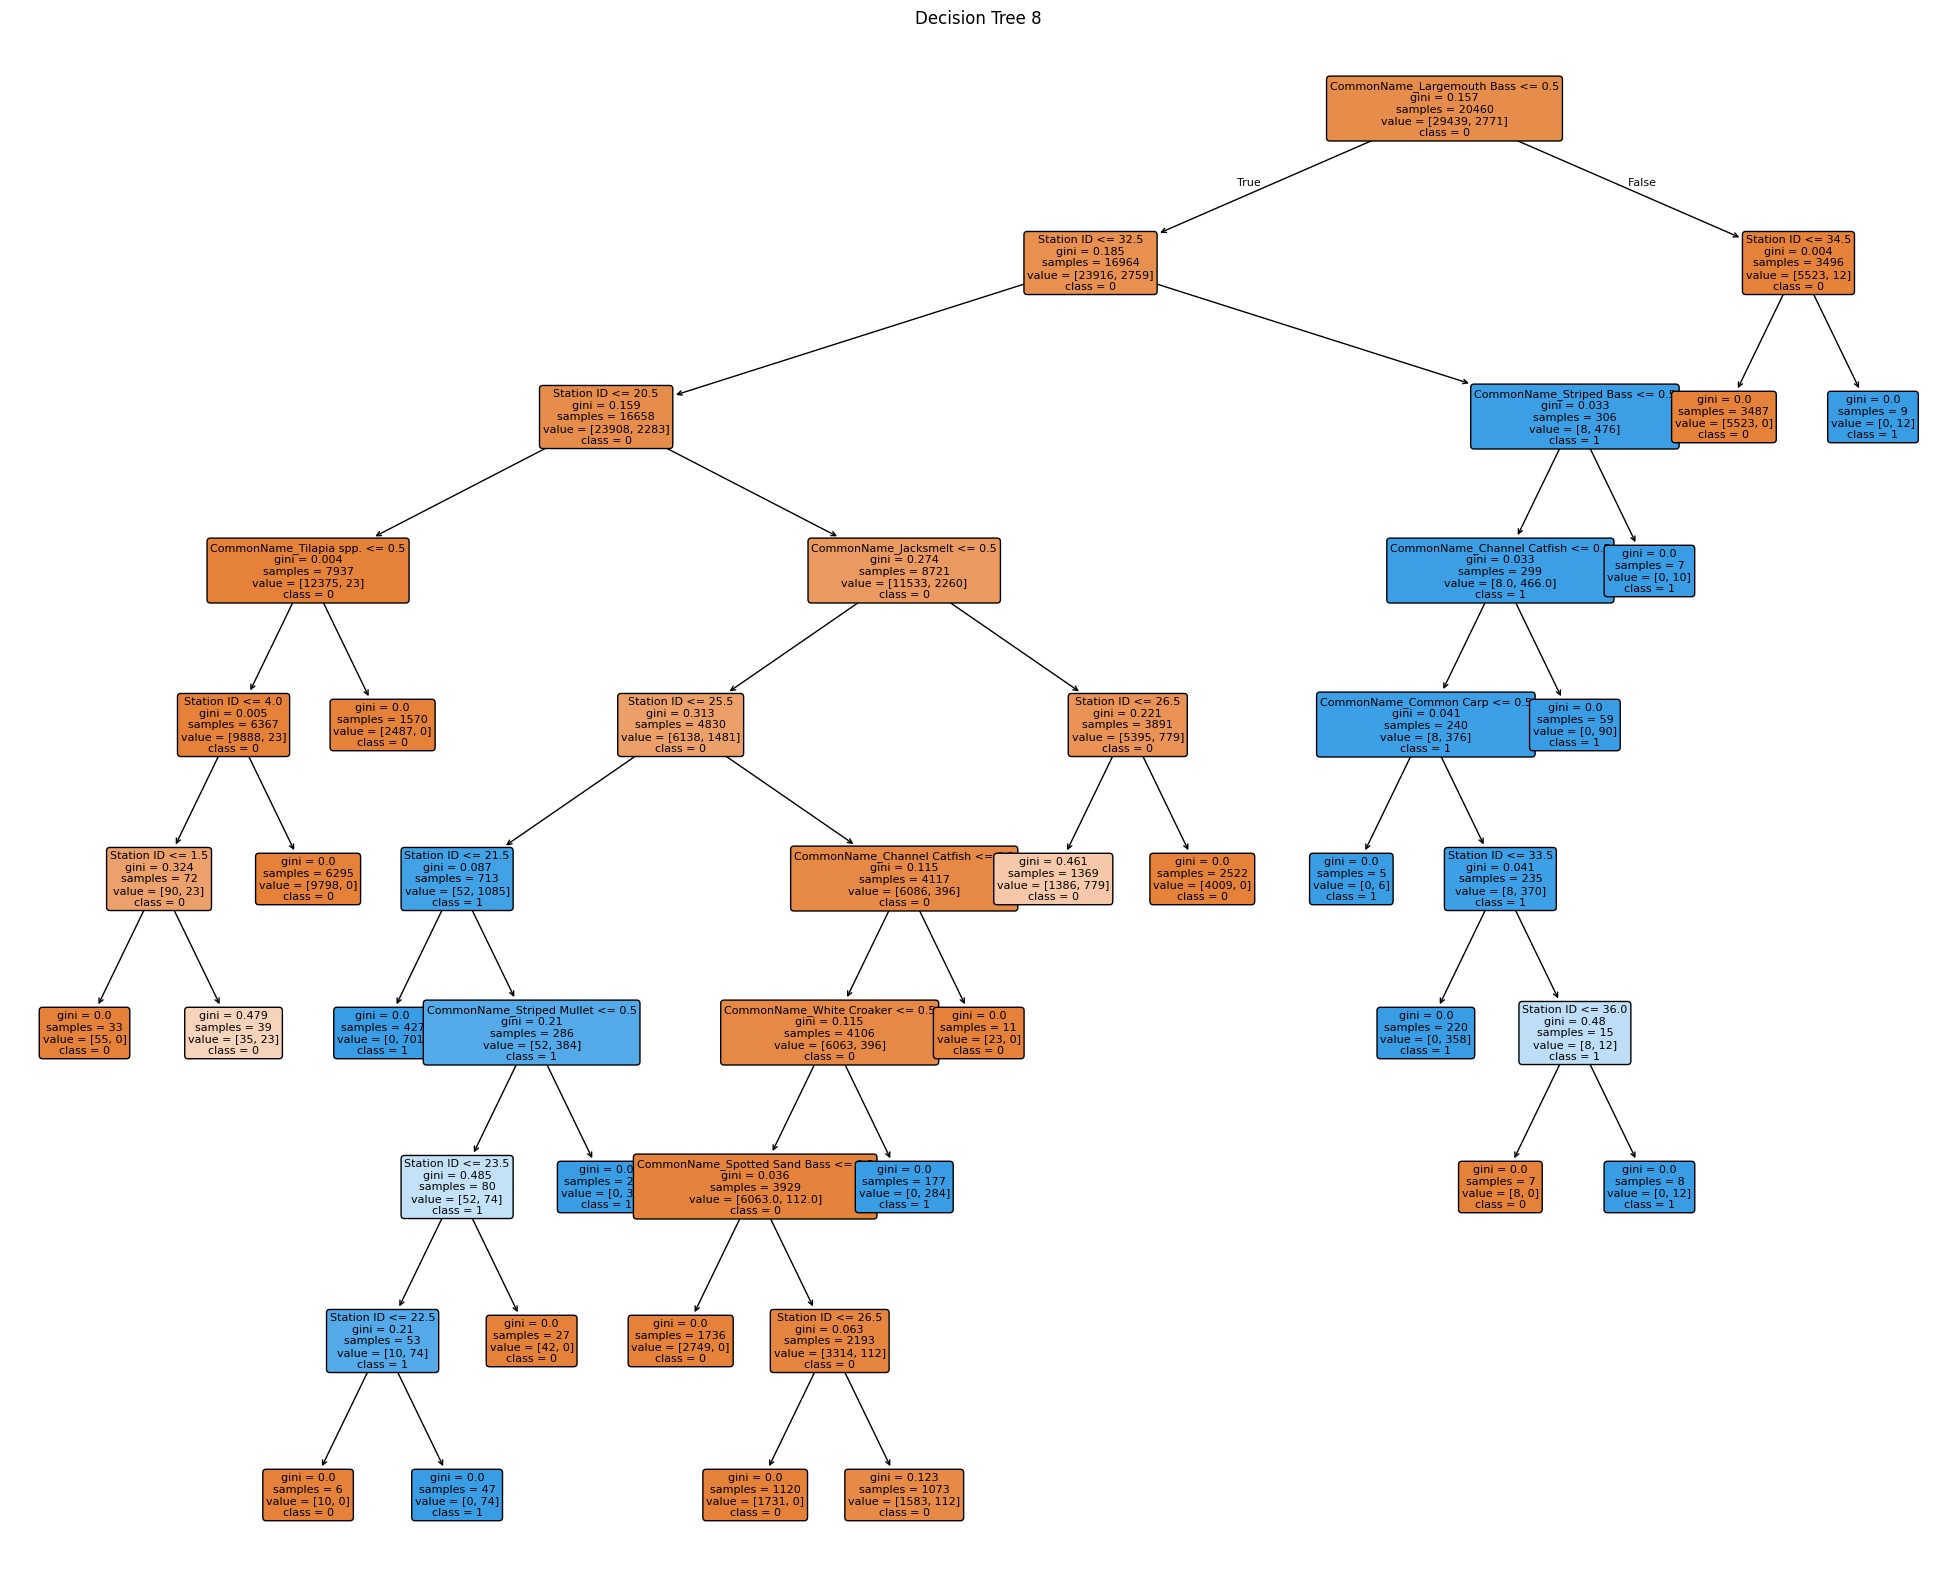

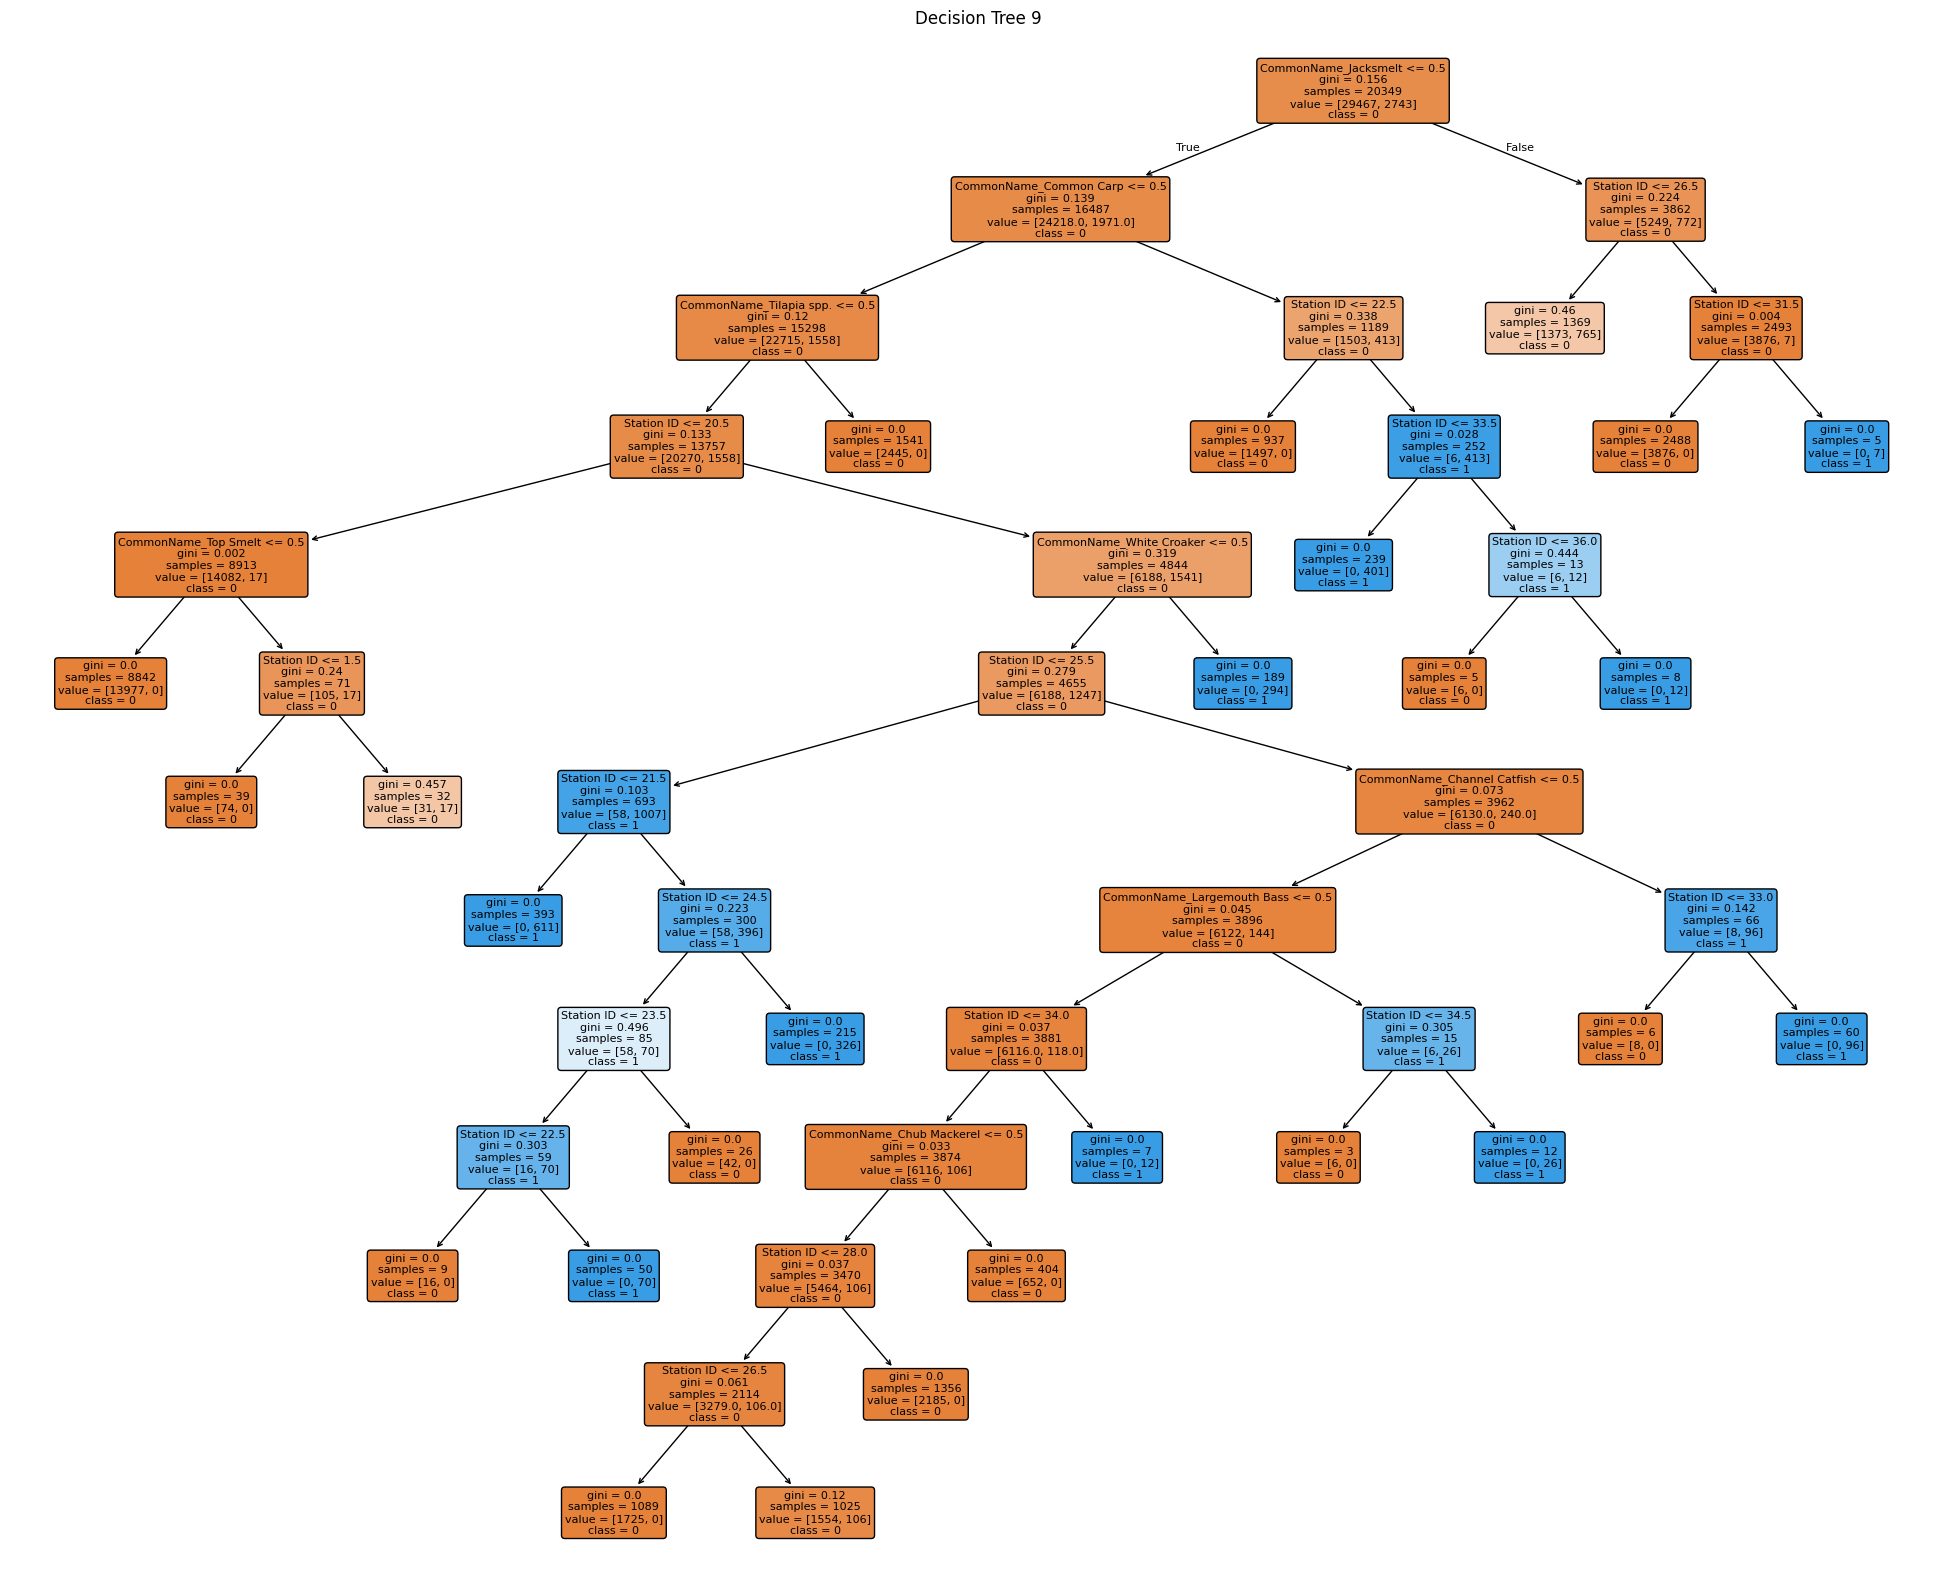

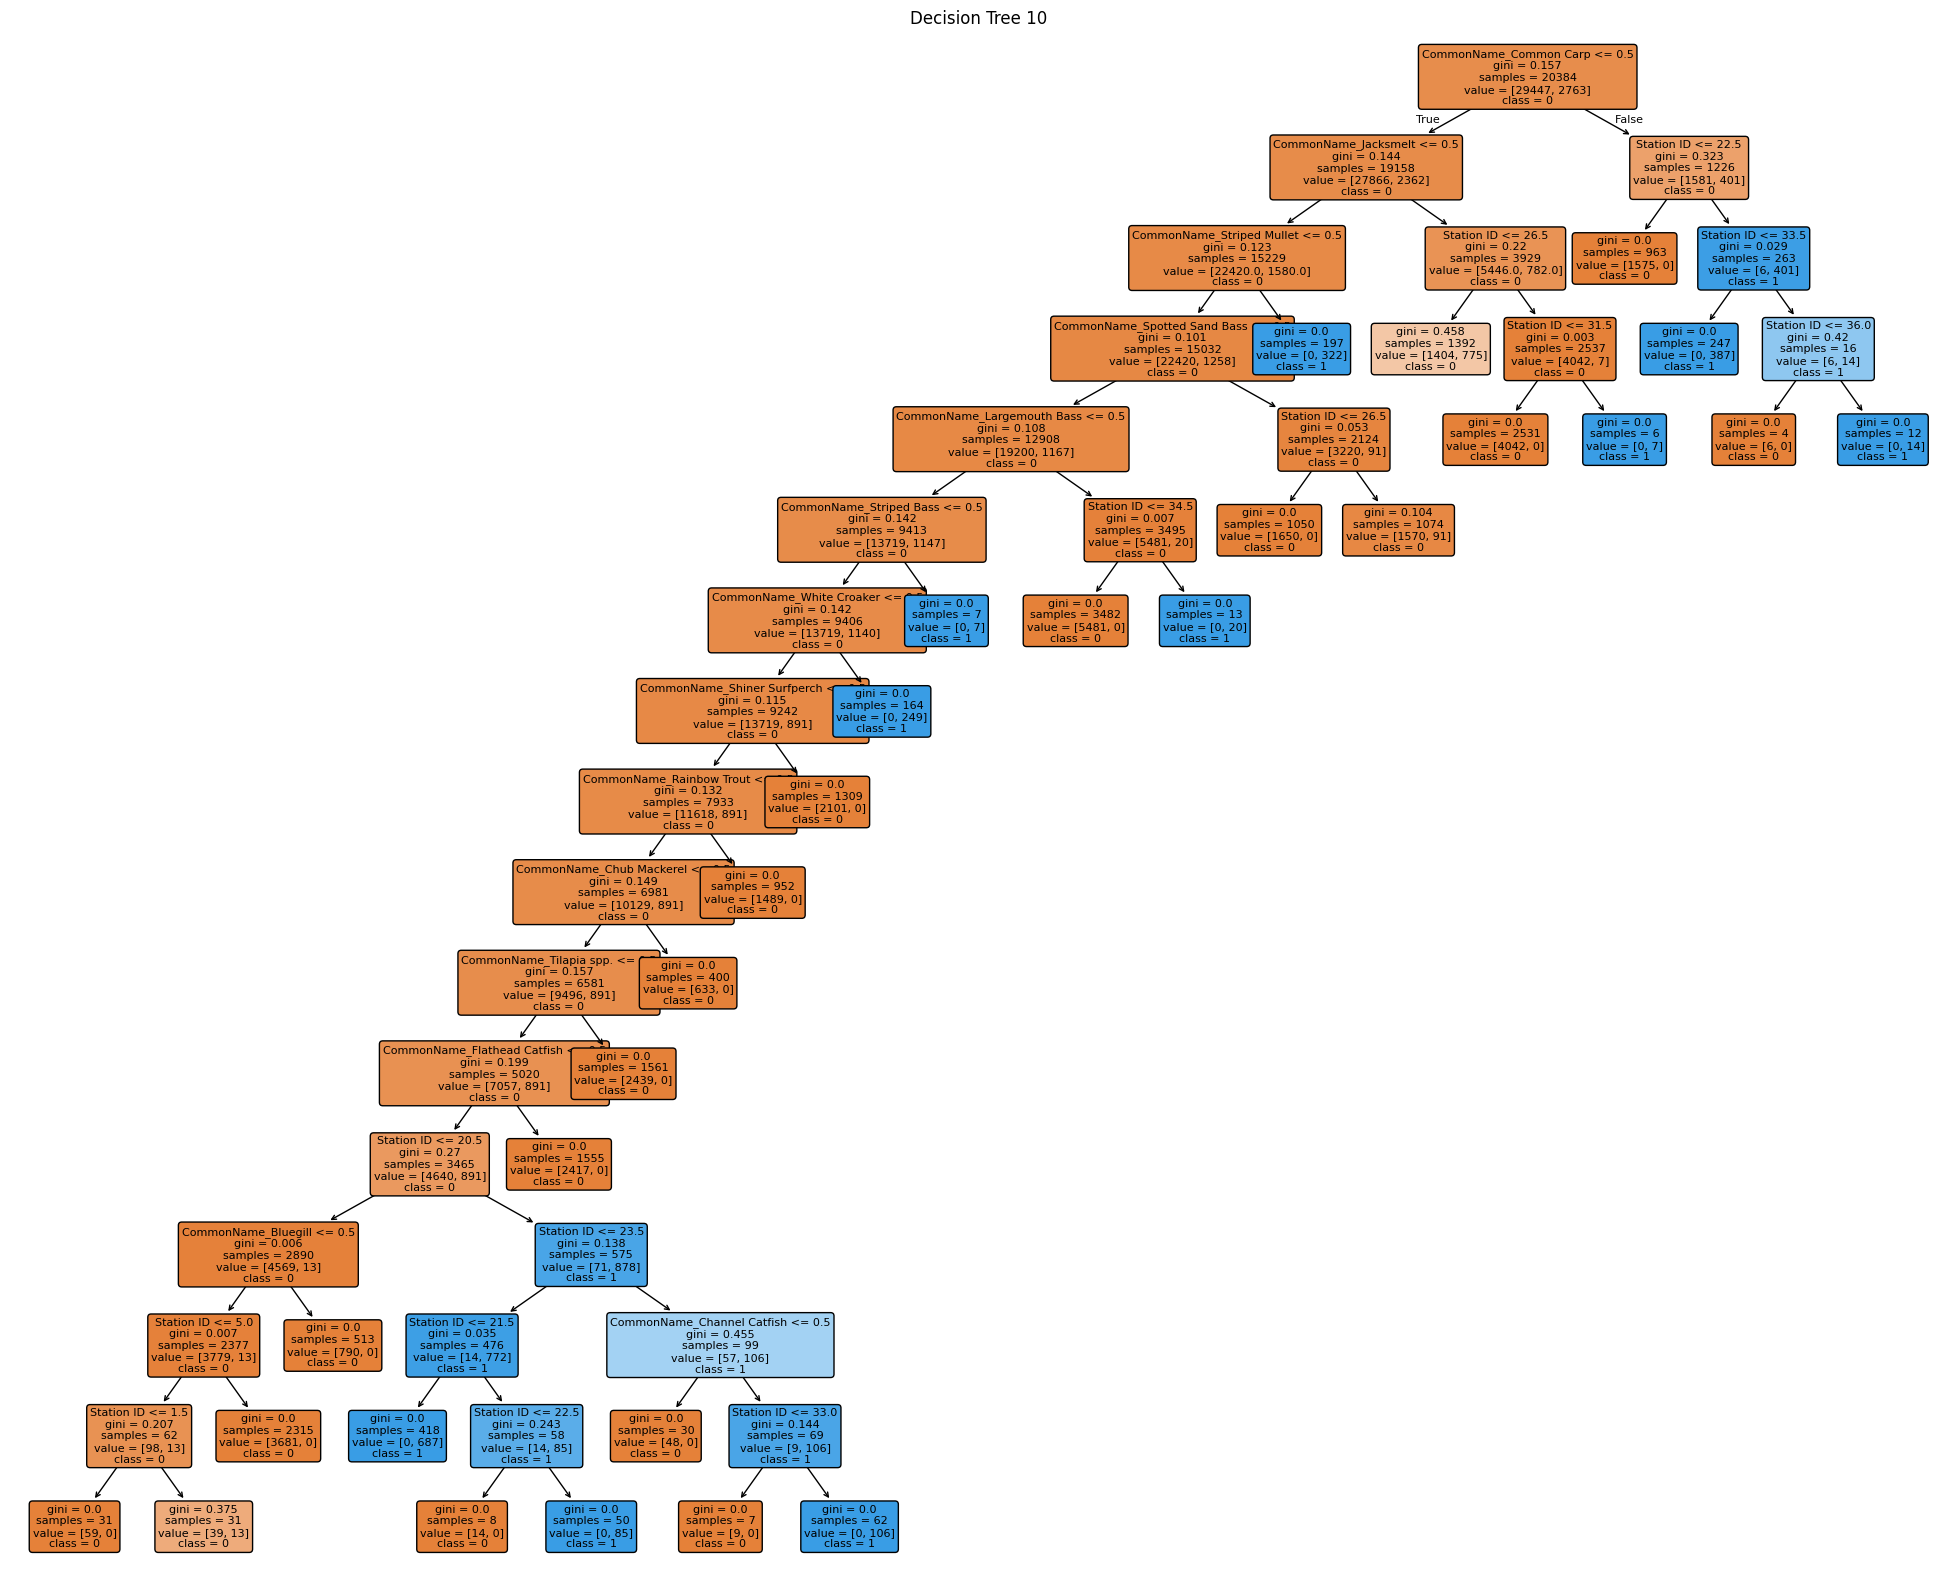

In [55]:
# Shows all the trees within the forest

for i in range(best_rf_model.named_steps['model'].n_estimators):
    plt.figure(figsize=(25,20))
    plot_tree(best_rf_model.named_steps['model'].estimators_[i],
              feature_names=X_train.columns,
              class_names=['0', '1'],
              filled=True, rounded=True,fontsize=8)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

## Visualize Map

In [ ]:
import plotly.express as px



filtered_df = PCB_df[PCB_df['PCB_threshold'] == 1]

location_counts = filtered_df.groupby(['Latitude', 'Longitude'])['PCB_threshold'].count().reset_index(name='counts')

# Create the bubble map
fig = px.scatter_mapbox(location_counts,
                        lat="Latitude",
                        lon="Longitude",
                        size="counts",
                        color="counts",
                        hover_data=["counts"],
                        zoom=5,
                        mapbox_style="open-street-map",
                        center={"lat": 36.7783, "lon": -119.4179},
                        title="PCB Concentrations in California (PCB_threshold = 1)")

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=5, mapbox_center={"lat": 36.7783, "lon": -119.4179})

fig.update_layout(
    width=800,
    height=800)
fig.show()